**Project Title: Diabetes Unlocked: Smart Strategies for Nutrition and Fitness Optimization**


Objective:-
The goal is to predict the severity of diabetes using natural language input such as patient history, symptoms, and lifestyle information. Based on the prediction, personalized diet and exercise recommendations will be provided.

**Project done by** : Dr. Maya Ammathil Manoharan




**DSML27 Batch**



**Introduction:**

Diabetes Unlocked is an AI-based system designed to predict whether a patient is diabetic using machine learning (ML) techniques. The system leverages models including:

**Random Forest** to manage complex feature interactions.
**Gradient Boosting** to enhance prediction accuracy.
**Logistic Regression **for straightforward classification tasks.

The system analyzes patient data, such as medical history, symptoms, and lifestyle factors, to assess diabetes risk. Based on the most significant variables identified by the model, it also provides personalized diet and exercise recommendations to help manage the condition. Techniques like cross-validation and SMOTE were used to optimize the models and address class imbalances, resulting in accurate predictions and tailored health plans for patients.

**Objectives:**

*   Diabetes Prediction: Accurately predict whether a patient is diabetic using machine learning models.
*   Personalized Health Recommendations: Provide personalized diet and exercise plans based on important variables identified in the prediction model.
*   Optimize ML Models: Improve model accuracy using techniques like cross-validation and SMOTE to handle class imbalance
*   Feature Importance: Identify the most critical factors (e.g., medical history, symptoms, lifestyle) contributing to the diabetes diagnosis.
*   Simplify Diagnosis Process: Develop an efficient, AI-powered system that assists healthcare providers in managing diabetes with tailored recommendations for patients.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score



All necessary libraries have been imported from the required modules to meet the project requirements.

In [ ]:

# Load the dataset and skip bad lines
df = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv', on_bad_lines='skip')

# Check the first few rows
print(df.head())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

Here i just imported the dataset required for my modeling, to check the data set. The code loads a CSV file, skips any bad rows, and prints the first few rows of the dataset.

In [ ]:
import csv

file_path = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'
expected_columns = 22  # Update this number based on how many columns you expect

# To store the lines that were skipped
skipped_lines = []

# Open the file and read it manually
with open(file_path, 'r') as file:
    reader = csv.reader(file)

    for i, line in enumerate(reader):
        if len(line) != expected_columns:
            skipped_lines.append(i + 1)  # Add 1 because Python uses 0-indexing, but CSV lines start at 1

# Print the line numbers that were skipped
print(f"Lines skipped: {skipped_lines}")

Lines skipped: [140385]


This code manually reads a CSV file, checks if each row has the expected number of columns (22 in this case), and collects the line numbers of rows that don't match. It does the following:

expected_columns = 22: Sets the expected number of columns for each row in the CSV file.
skipped_lines = []: Initializes an empty list to store the line numbers of any problematic rows.
with open(file_path, 'r') as file: Opens the CSV file for reading.
reader = csv.reader(file): Reads the file line by line.
for i, line in enumerate(reader): Iterates through each line, where i is the line number (starting from 0) and line is the row's content.
if len(line) != expected_columns: Checks if the number of columns in the current row matches the expected number.
skipped_lines.append(i + 1): Adds the line number (adjusted to 1-based indexing) to the list if the row is problematic.
print(f"Lines skipped: {skipped_lines}"): Prints the list of skipped lines.
In summary, this code identifies and logs rows in the CSV file that don't have the correct number of columns. Here the skipped lines were printed out to be none.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140384 entries, 0 to 140383
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       140384 non-null  float64
 1   HighBP                140384 non-null  float64
 2   HighChol              140384 non-null  float64
 3   CholCheck             140384 non-null  float64
 4   BMI                   140384 non-null  float64
 5   Smoker                140384 non-null  float64
 6   Stroke                140384 non-null  float64
 7   HeartDiseaseorAttack  140384 non-null  float64
 8   PhysActivity          140383 non-null  float64
 9   Fruits                140383 non-null  float64
 10  Veggies               140383 non-null  float64
 11  HvyAlcoholConsump     140383 non-null  float64
 12  AnyHealthcare         140383 non-null  float64
 13  NoDocbcCost           140383 non-null  float64
 14  GenHlth               140383 non-null  float64
 15  

This output describes a DataFrame in pandas with 253,680 entries (rows) and 22 columns. Each column is non-null (no missing data) and of type float64 (floating-point numbers). The memory usage of the DataFrame is approximately 42.6 MB. The columns include health-related indicators like Diabetes_binary, HighBP, BMI, Smoker, and others, which are all numeric values.

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,140384.000000,140384.000000,140384.000000,140384.000000,140384.000000,140384.000000,140384.000000,140384.000000,140383.000000,140383.000000,...,140383.000000,140383.000000,140383.000000,140383.000000,140383.000000,140383.000000,140383.000000,140383.000000,140383.000000,140383.00000
mean,0.138321,0.428525,0.425227,0.962567,28.454361,0.446255,0.041116,0.093451,0.759536,0.637335,...,0.951590,0.081498,2.499377,3.110405,4.172799,0.164899,0.440096,8.060542,5.071241,6.09556
std,0.345237,0.494867,0.494379,0.189821,6.937948,0.497105,0.198559,0.291064,0.427367,0.480771,...,0.214633,0.273600,1.063671,7.292523,8.636130,0.371091,0.496400,3.051822,0.974086,2.04840
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.00000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.00000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.00000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.00000



The data.describe() method in pandas provided a summary of descriptive statistics for the DataFrame of dibates named as df, which is focusing on numerical columns by default. In the count section, the number of non-null entries for each column is mentioned. This helps to identify missing data in each feature. The mean icluded arithmetic average of the data in each column, representing the central tendency. The sd measure show how the much data points of each column are varied from the mean. A higher standard deviation indicates more variation in the data. The minimum value means the smallest value in the column. This helps in identifying any potential outliers at the lower end. 25th Percentile (25%) section includes the value below which 25% of the data falls. This helps to understand the lower quartile of the data. 50th Percentile (50%) / Median: means the value below which 50% of the data falls, also known as the median. This is a robust measure of central tendency and is less affected by outliers than the mean.75th Percentile (75%) section where the value below which 75% of the data falls, giving insight into the upper quartile of the data.In Maximum (max) section, the largest value in the column that were mentioned. This is useful for detecting outliers at the higher end of the data. But as there are 22 features, its better to visualize, by boxplot or through histogram.

`

In [ ]:
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,1
Fruits,1


This data frame have 0 null values in all the features. As no null values, dropna() was not used

In [ ]:
df.isnull().sum()/len(df)*100

,0
Diabetes_binary,0.000000
HighBP,0.000000
HighChol,0.000000
CholCheck,0.000000
BMI,0.000000
Smoker,0.000000
Stroke,0.000000
HeartDiseaseorAttack,0.000000
PhysActivity,0.000712
Fruits,0.000712


The data has been cleaned, and there are no missing (null) values in any of the columns. Each column listed has 100% non-null entries, indicating that the dataset is complete and no further imputation or removal of missing data is necessary.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

,0
Diabetes_binary,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


In [ ]:
df.duplicated().sum()

10327

the dataset contains 24,206 rows that are identical to others in the DataFrame.

In [ ]:
df.drop_duplicates(inplace=True)

Now all the duplicates weThe code removes duplicate rows from the DataFrame and updates it directly.re removed by drop_duplicate function.

In [ ]:
df.duplicated().sum()

0

Again the duplicates in dataframe checked and now the present dataframe has no duplicate values.

In [ ]:
len(df)

130056

The expression len(df) returns the total number of rows in the DataFrame df. In this case, after removing duplicates, the DataFrame now contains 229,474 rows.

In [ ]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()
cat_df.columns

Index([], dtype='object')

The output Index([], dtype='object') indicates that the cat_df DataFrame has no columns. This means that there were no columns of type 'object' (string or categorical data) in the original DataFrame df.

In [ ]:
num_df= df.select_dtypes(include=['number'])
num_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


This code extracts all numeric columns from df and shows a preview of the first few rows of the resulting DataFrame num_df.

In [ ]:
num_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140378,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,5.0,4.0
140379,0.0,0.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,6.0
140380,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,6.0
140381,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,5.0


This will show you the numeric data along with their respective column names.

In [ ]:
# Calculate skewness for all numerical columns
skewness = df.skew()
print("Skewness of each feature:\n", skewness)

Skewness of each feature:
 Diabetes_binary         1.975309
HighBP                  0.205139
HighChol                0.243719
CholCheck              -4.698100
BMI                     2.447839
Smoker                  0.139882
Stroke                  4.426591
HeartDiseaseorAttack    2.660390
PhysActivity           -1.104582
Fruits                 -0.494904
Veggies                -1.476206
HvyAlcoholConsump       3.684797
AnyHealthcare          -4.026802
NoDocbcCost             2.911529
GenHlth                 0.385008
MentHlth                2.631995
PhysHlth                2.112324
DiffWalk                1.684583
Sex                     0.242430
Age                    -0.392701
Education              -0.712301
Income                 -0.829748
dtype: float64


Here the skewness is tested over all numerical columns in df dataframe.
Skewness > 0: Right-skewed (tail on the right).
Skewness < 0: Left-skewed (tail on the left).
The output provides an overview of the skewness for each feature, which can be useful for understanding the distribution of the data and determining if any transformations (like log or square root) might be necessary for modeling or analysis.

In [ ]:
# Calculate kurtosis for all numerical columns
kurtosis = df.kurt()
print("Kurtosis of each feature:\n", kurtosis)

Kurtosis of each feature:
 Diabetes_binary          1.901877
HighBP                  -1.957948
HighChol                -1.940631
CholCheck               20.072456
BMI                     13.394504
Smoker                  -1.980463
Stroke                  17.594981
HeartDiseaseorAttack     5.077751
PhysActivity            -0.779912
Fruits                  -1.755097
Veggies                  0.179187
HvyAlcoholConsump       11.577904
AnyHealthcare           14.215353
NoDocbcCost              6.477099
GenHlth                 -0.374437
MentHlth                 5.956868
PhysHlth                 3.072420
DiffWalk                 0.837834
Sex                     -1.941258
Age                     -0.571273
Education               -0.036738
Income                  -0.368879
dtype: float64


Kurtosis gives insights into the shape of the data's tails.
High kurtosis (>3) means heavier tails (more outliers).
Low kurtosis (<3) means lighter tails (fewer outliers). This kurtosis output highlights the distribution characteristics of each feature, indicating which features have heavy or light tails. Understanding kurtosis is important for assessing the potential impact of outliers on statistical analyses and for deciding whether data transformations might be needed.

In [ ]:
num_df_columns = num_df.columns
num_df_columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

num_df_columns, you will see an output that lists the names of all the numeric columns in num_df. This will help you understand which specific numeric features are available for further analysis or modeling.

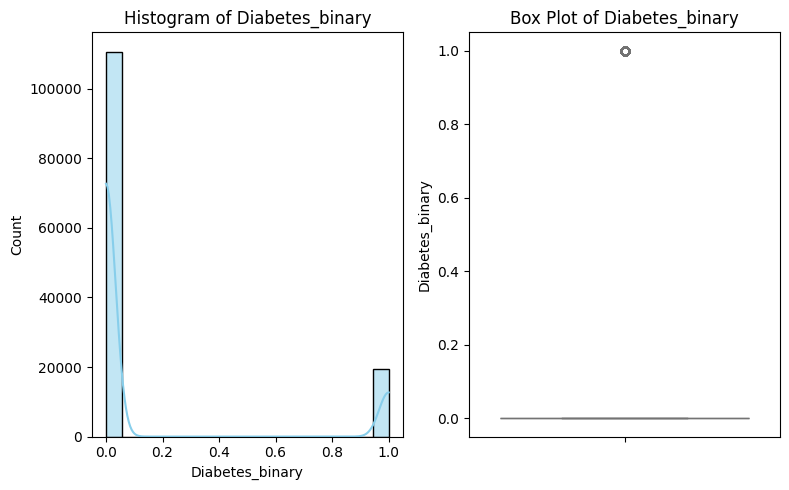

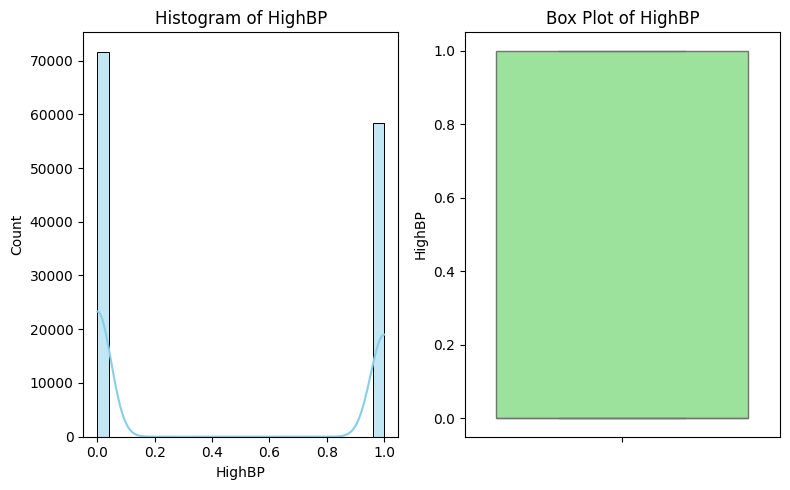

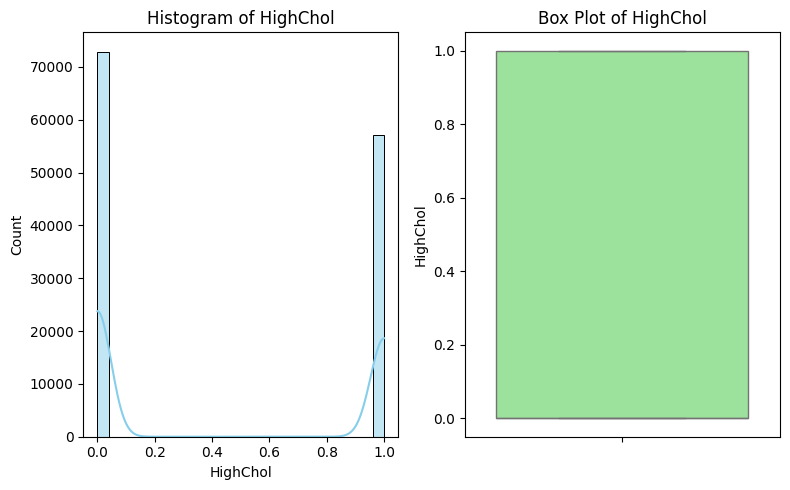

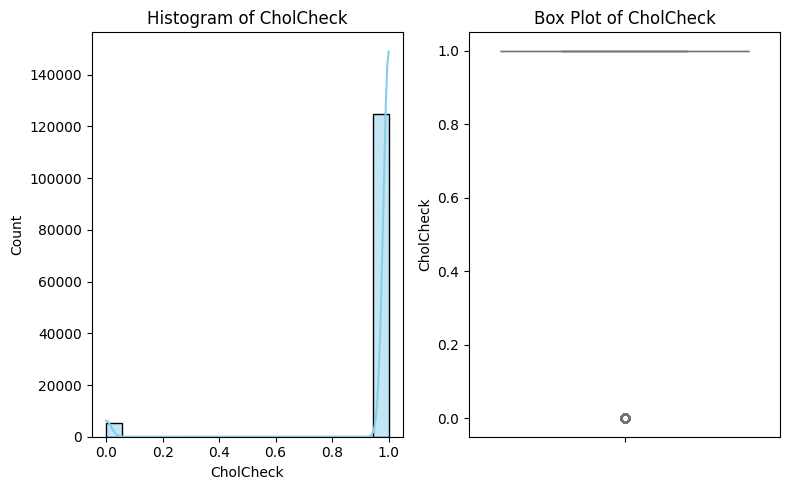

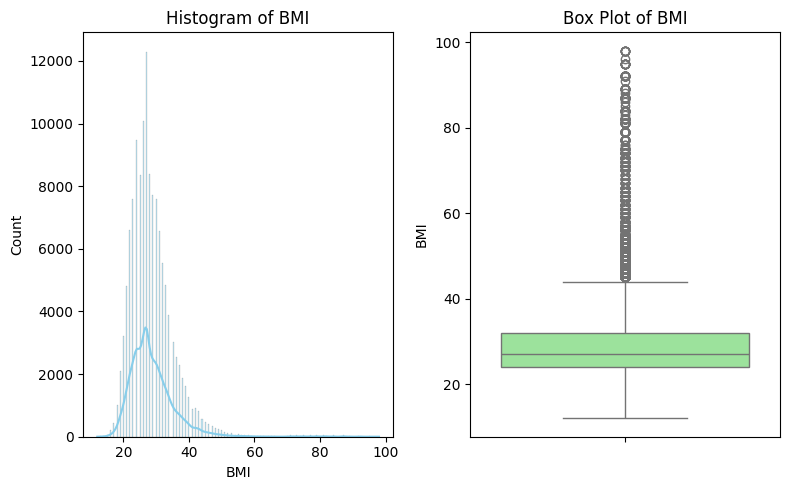

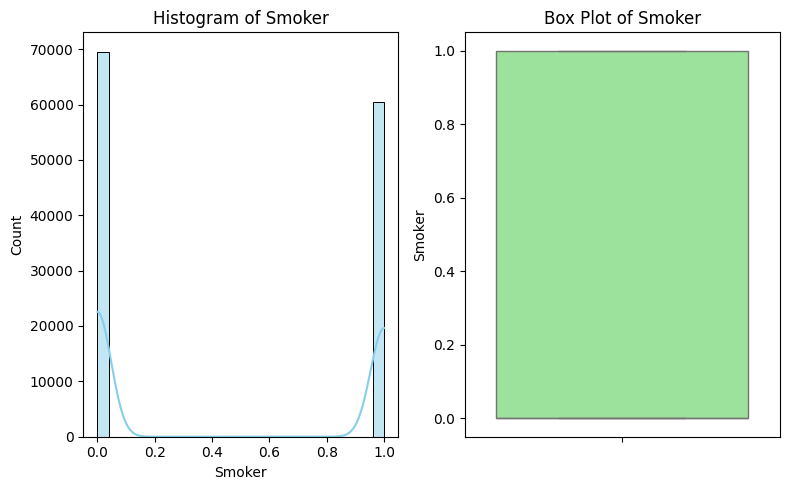

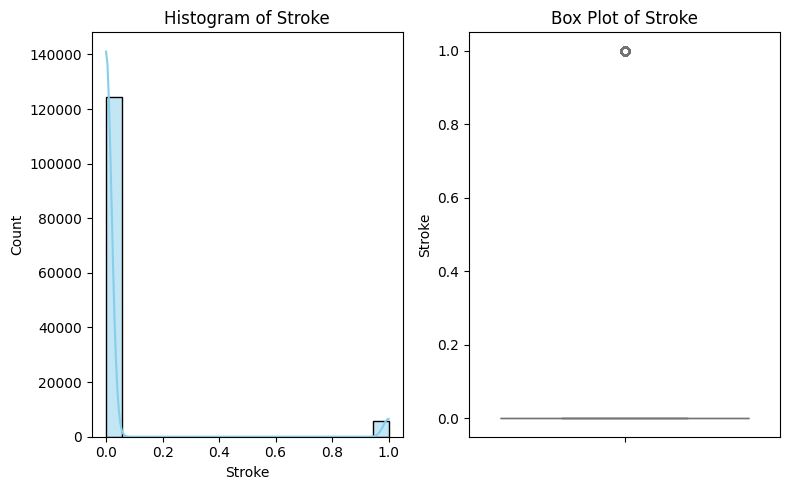

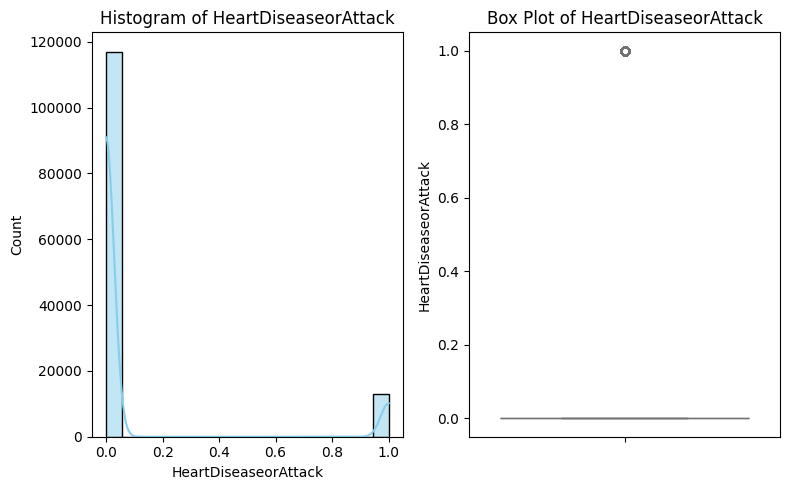

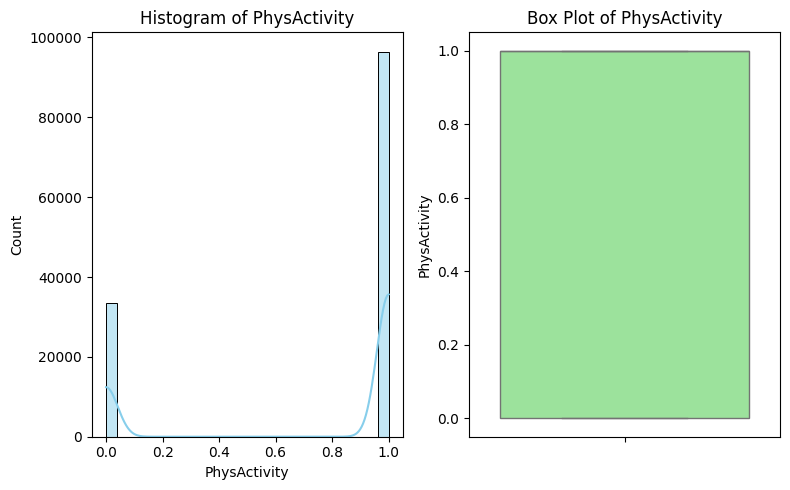

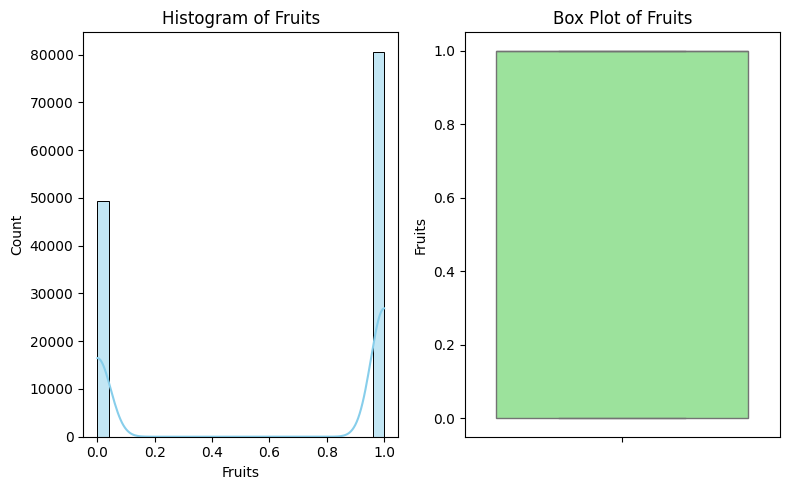

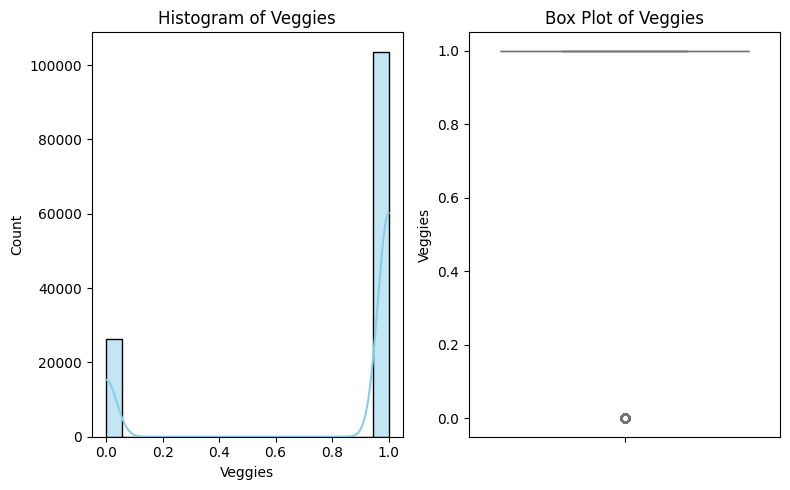

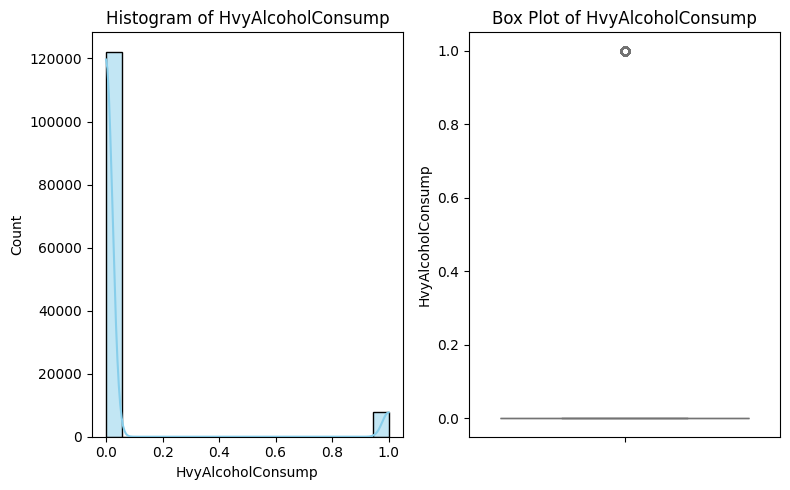

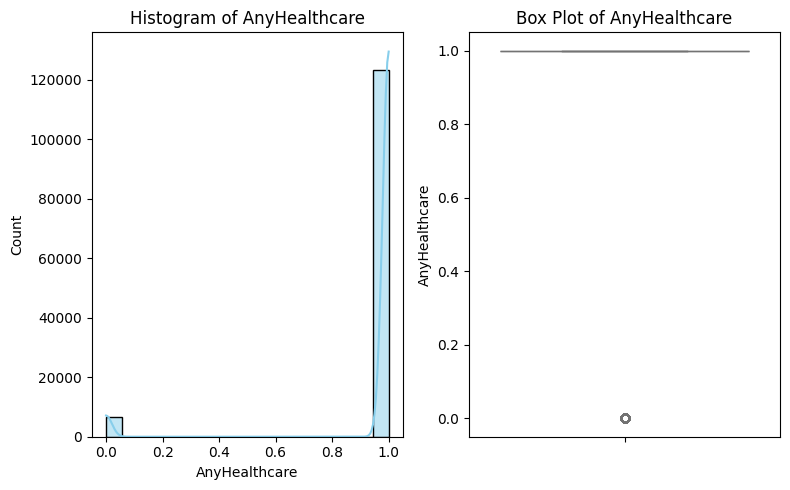

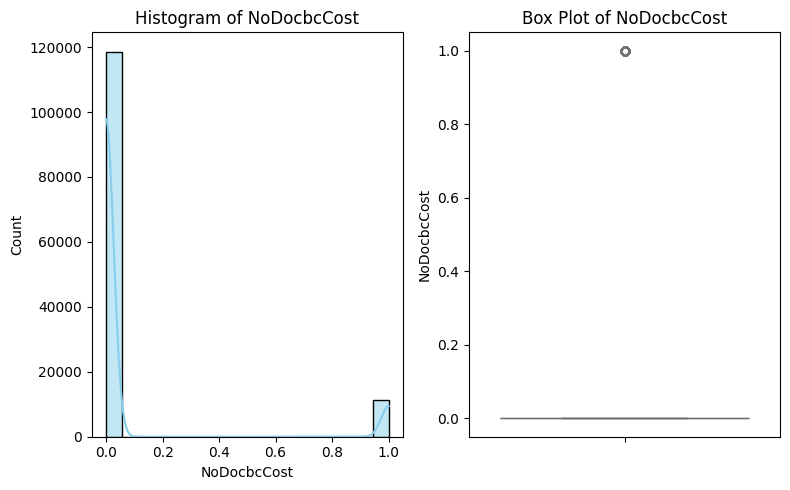

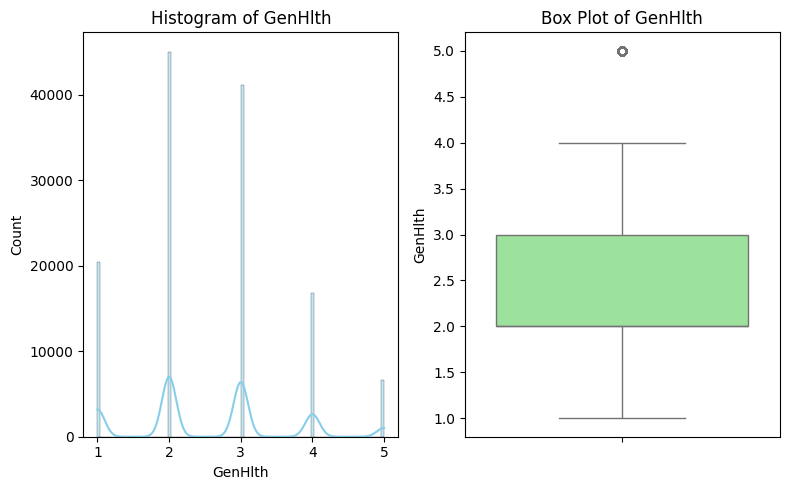

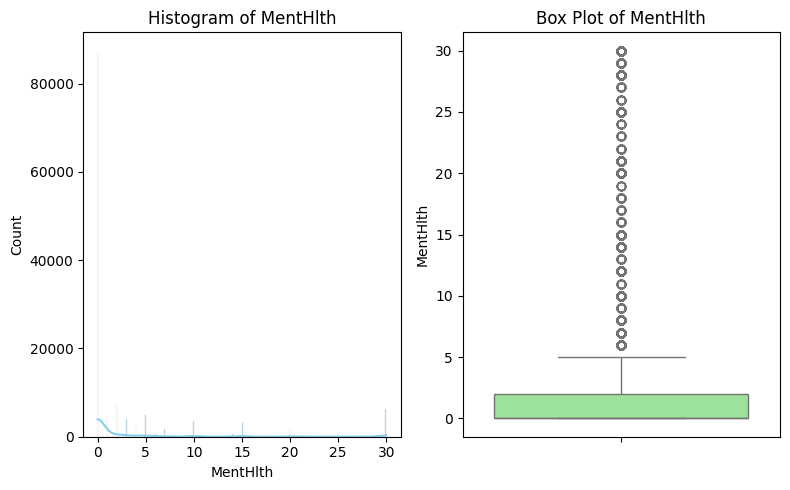

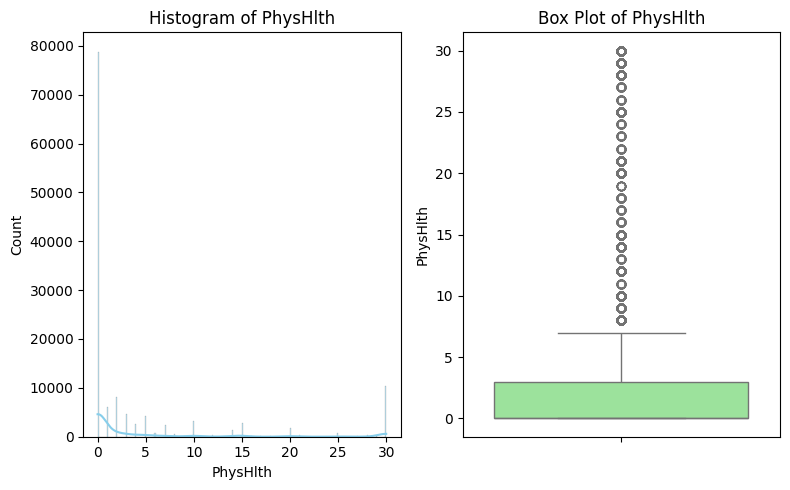

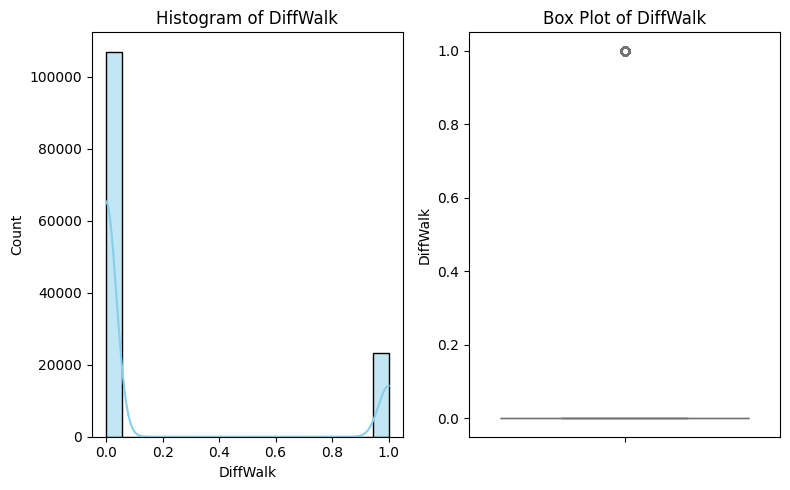

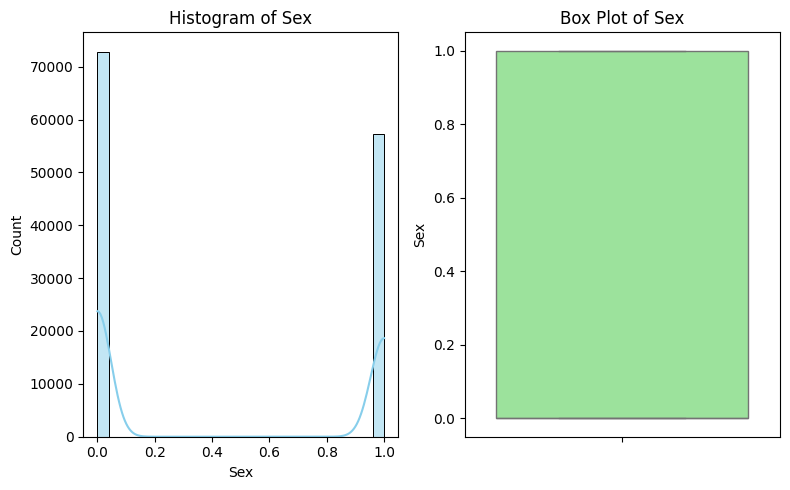

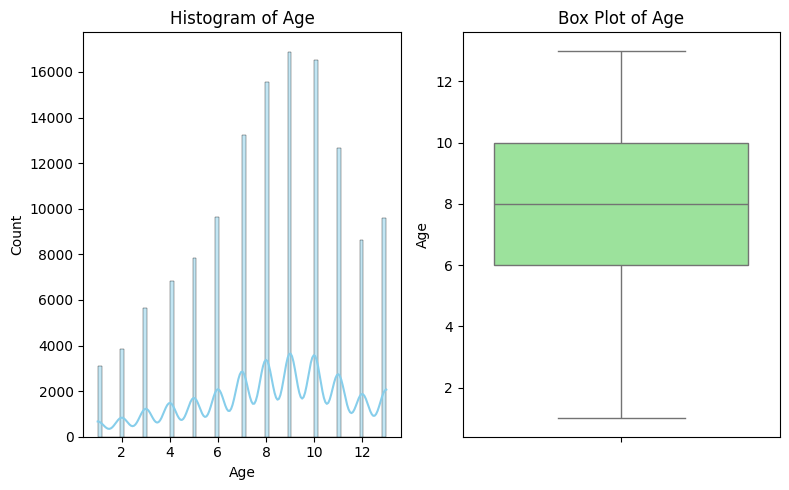

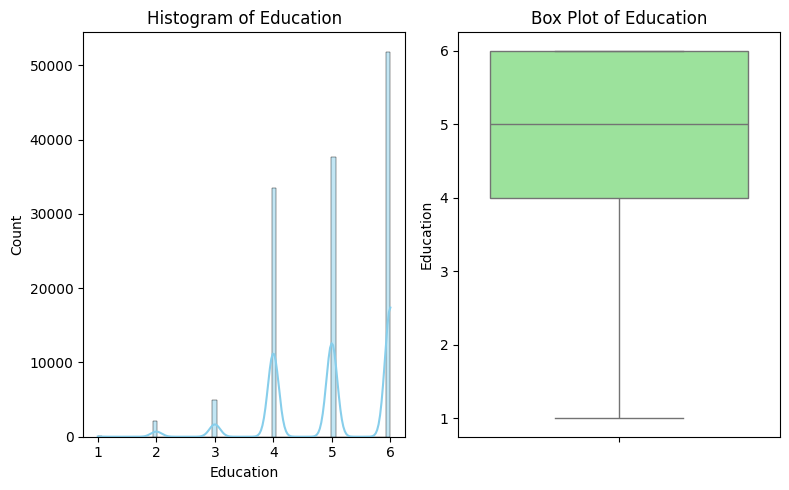

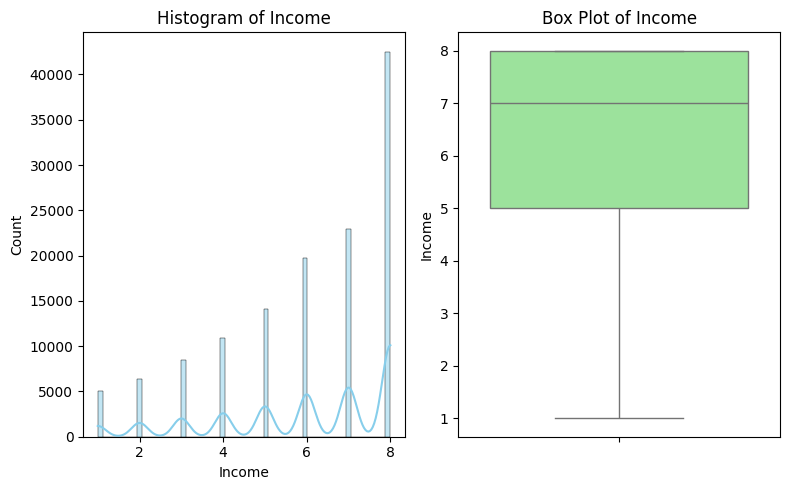

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for plotting histograms and boxplots side by side for each column
for col in num_df_columns:
    # Create a figure
    plt.figure(figsize= (8, 5))

    # First subplot (left side) - Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(num_df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')  # Corrected syntax

    # Second subplot (right side) - Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=num_df[col], color='lightgreen')  # Specify y-axis for boxplot
    plt.title(f'Box Plot of {col}')  # Corrected syntax

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


The code visualizes each numeric column using histograms and boxplots to identify outliers:

**Histogram with KDE**: Displays the frequency distribution and shape of the data. Helps identify potential outliers in the tails.
**Boxplot**: Summarizes key statistics (median, interquartile range).
Clearly shows outliers as points outside the whiskers.

These plots provide insights into data distribution and highlight extreme values effectively.

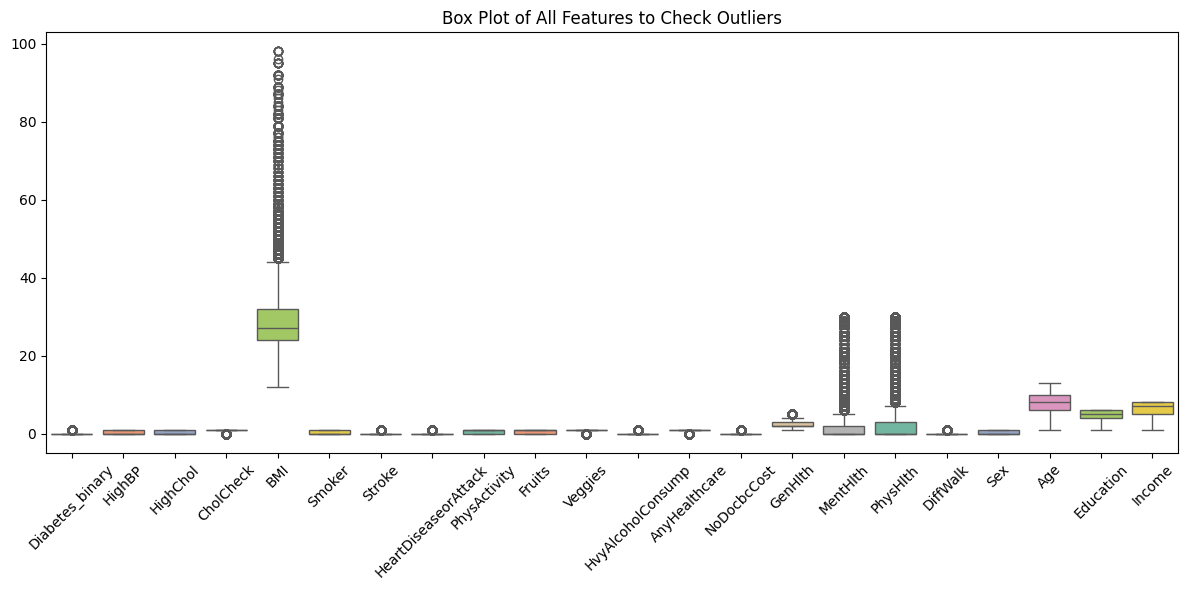

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for all columns of cleaned_num_df to check for outliers
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=num_df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot of All Features to Check Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the combined boxplot for all features
plt.show()


The code creates a combined boxplot for all numeric columns in the DataFrame num_df to check for outliers:

Figure Setup: A 12x6 inch figure is created.
Boxplot Creation: It uses Seaborn's boxplot function to visualize all features, highlighting outliers with a 'Set2' color palette.
Title and Labels: The plot is titled "Box Plot of All Features to Check Outliers," and x-axis labels are rotated for readability.
Layout Adjustment: plt.tight_layout() ensures a clean arrangement of plot elements.
Display: The boxplot is rendered with plt.show(), allowing visual assessment of outliers.

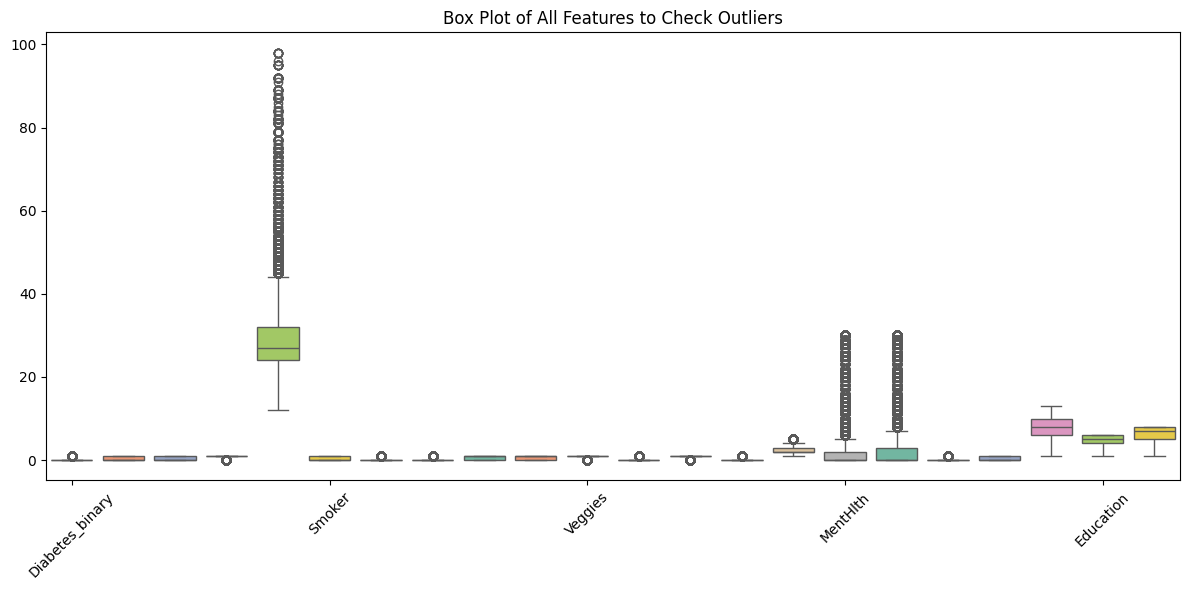

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for all columns of cleaned_num_df to check for outliers
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=num_df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot of All Features to Check Outliers')

# Rotate x-axis labels for readability and set ticks to every 5th label
plt.xticks(ticks=range(0, len(num_df.columns), 5), labels=num_df.columns[::5], rotation=45)

# Adjust layout
plt.tight_layout()

# Show the combined boxplot for all features
plt.show()


In [ ]:
num_df.drop(columns='Income', inplace=True)

Dropping the 'Income' column as it's not necessary for predicting diabetes

In [ ]:
num_df['Diabetes_binary'].unique()

array([0., 1.])

Checking if removing outliers affected the 'Diabetes_binary' column, which should still have two unique outputs

In [ ]:
num_df_columns=num_df.columns
num_df_columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education'],
      dtype='object')

The column names stored in num_df_columns are visualised to inspect that is the income column removed or not.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, yeojohnson

# Define the target column
target_column = 'Diabetes_binary'
target_data = num_df[target_column].copy()  # Copy to ensure no changes

# Copy the original DataFrame without the target column
cleaned_num_df = num_df.drop(columns=[target_column]).copy()

# Define the skewness threshold range
skewness_threshold = 0.9

# Loop through numerical columns and adjust skewness
for col in cleaned_num_df.columns:
    # Remove non-finite values by filling or dropping (choose method based on your dataset)
    cleaned_num_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    if cleaned_num_df[col].isna().any():
        cleaned_num_df[col].fillna(cleaned_num_df[col].median(), inplace=True)  # or use .mean()

    # Calculate the initial skewness
    skewness = cleaned_num_df[col].skew()
    print(f'Initial skewness of {col}: {skewness}')

    # Apply transformations if skewness exceeds the threshold
    if abs(skewness) > skewness_threshold:
        # Check if all values are positive (Box-Cox requires positive data)
        if (cleaned_num_df[col] > 0).all():
            cleaned_num_df[col], _ = boxcox(cleaned_num_df[col])
            print(f'Applied Box-Cox transformation on {col}')
        else:
            # Apply Yeo-Johnson transformation for non-positive values
            cleaned_num_df[col], _ = yeojohnson(cleaned_num_df[col])
            print(f'Applied Yeo-Johnson transformation on {col}')

        # Recalculate skewness
        new_skewness = cleaned_num_df[col].skew()
        print(f'New skewness of {col} after Box-Cox/Yeo-Johnson: {new_skewness}')

        # Additional transformations if skewness is still high
        if abs(new_skewness) > skewness_threshold and (cleaned_num_df[col] >= 0).all():
            cleaned_num_df[col] = np.sqrt(cleaned_num_df[col])
            new_skewness = cleaned_num_df[col].skew()
            print(f'Applied square root transformation on {col}, new skewness: {new_skewness}')

        if abs(new_skewness) > skewness_threshold and (cleaned_num_df[col] > 0).all():
            cleaned_num_df[col] = np.log1p(cleaned_num_df[col])  # log1p to handle log(0)
            new_skewness = cleaned_num_df[col].skew()
            print(f'Applied log transformation as last option on {col}, new skewness: {new_skewness}')

        if abs(new_skewness) > skewness_threshold:
            print(f'Warning: Skewness of {col} is still high ({new_skewness}), consider manual outlier handling.')

# Recombine cleaned numerical data with the target column (ensuring no changes to target)
cleaned_num_df[target_column] = target_data

# Check for data loss in the target column
unique_target_values = cleaned_num_df[target_column].unique()
print(f'Unique values of target column after cleaning: {unique_target_values}')

# Check the shape of the cleaned data
print(f'Original data shape: {num_df.shape}')
print(f'Cleaned data shape: {cleaned_num_df.shape}')



<ipython-input-360-6f5030db8d1c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_num_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)


Initial skewness of HighBP: 0.20513891082140517
Initial skewness of HighChol: 0.24371897765559178
Initial skewness of CholCheck: -4.698100343719626
Applied Yeo-Johnson transformation on CholCheck
New skewness of CholCheck after Box-Cox/Yeo-Johnson: -4.69810034371962
Applied square root transformation on CholCheck, new skewness: -4.698100343719626
Initial skewness of BMI: 2.447839204230727
Applied Box-Cox transformation on BMI
New skewness of BMI after Box-Cox/Yeo-Johnson: -0.033957675551221346
Initial skewness of Smoker: 0.1398823781422513
Initial skewness of Stroke: 4.426591300281238
Applied Yeo-Johnson transformation on Stroke
New skewness of Stroke after Box-Cox/Yeo-Johnson: 4.426591300281237
Applied square root transformation on Stroke, new skewness: 4.426591300281237
Initial skewness of HeartDiseaseorAttack: 2.660389635668908
Applied Yeo-Johnson transformation on HeartDiseaseorAttack
New skewness of HeartDiseaseorAttack after Box-Cox/Yeo-Johnson: 2.660389635668907
Applied square r

This code addresses skewness in a DataFrame (num_df) and applies various transformations to reduce it, while preserving the target column ('Diabetes_binary'). Here's a summary:

Target Column Separation: The 'Diabetes_binary' column is separated from the rest of the DataFrame to prevent alterations during transformations.
Skewness Adjustment: For each numerical column, the initial skewness is calculated. If the skewness exceeds the defined threshold (0.9), transformations are applied in the following order:
Box-Cox transformation (if all values are positive).
Yeo-Johnson transformation (for columns with non-positive values).
Square root transformation (if skewness remains high and values are non-negative).
Log transformation (if all else fails and values are positive).
After each transformation, the new skewness is checked to ensure it's reduced.
Skewness Monitoring:

If skewness remains high even after all transformations, a warning is printed to suggest manual outlier handling.
Recombining the Target Column:

The 'Diabetes_binary' column is added back to the cleaned DataFrame without any changes.
Final Checks:

The unique values of the 'Diabetes_binary' column are checked to ensure no data was lost.
The shape of the original and cleaned DataFrame is compared to confirm data integrity.
This process helps ensure that the numerical data is normalized, potentially improving model performance by addressing high skewness.

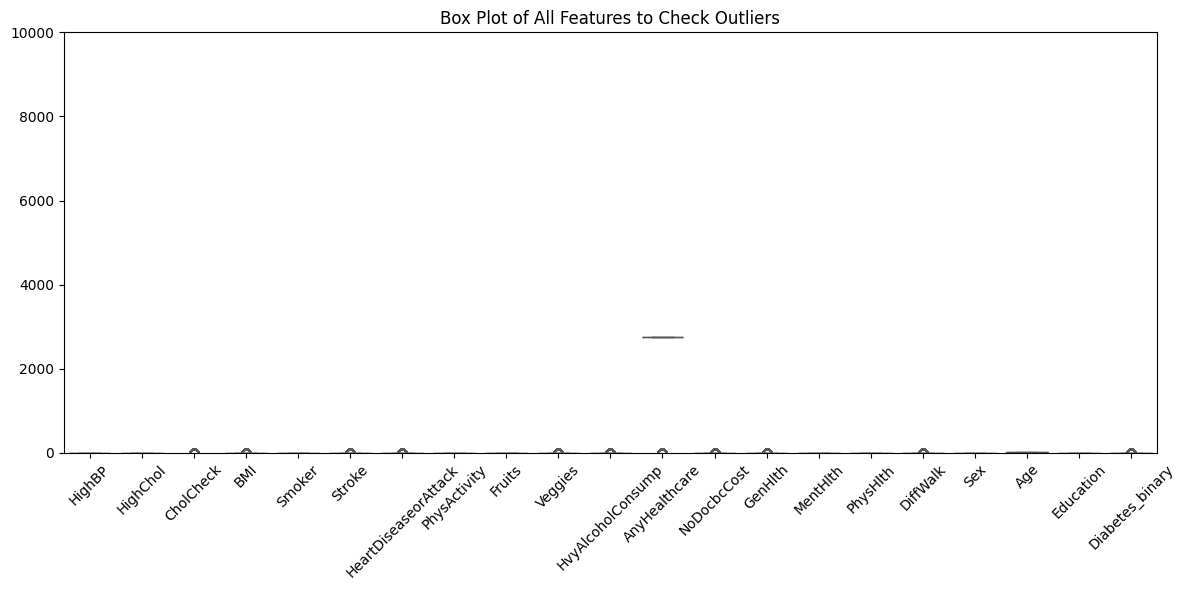

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for all columns of cleaned_num_df to check for outliers
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=cleaned_num_df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot of All Features to Check Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Limit y-axis values to 10,000
plt.ylim(0, 10000)
plt.tight_layout()

# Show the combined boxplot for all features
plt.show()


Again outliers were checked over all features

In [ ]:
cleaned_num_df['Diabetes_binary'].unique()


array([0., 1.])

Checked the target column, to know is the preprocessing effected the target columns.

In [ ]:
cleaned_num_df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,110723
1.0,19333


Each unique value in the target column is counted to check for bias in the target distribution. Based on this analysis, the outputs in the target column are found to be imbalanced.

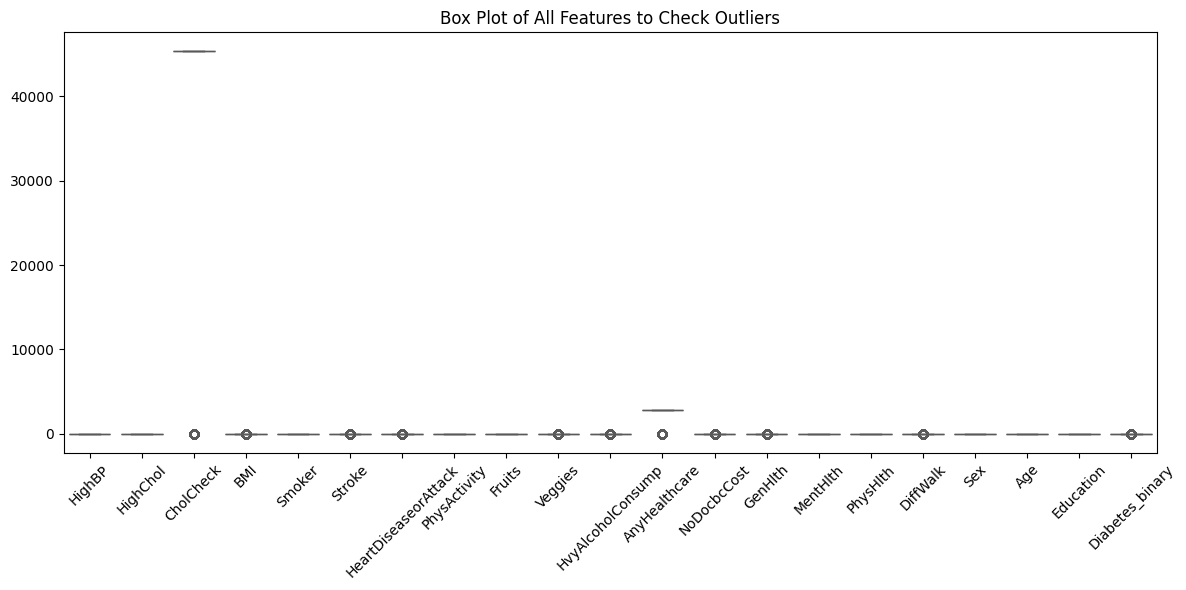

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for all columns of cleaned_num_df to check for outliers
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=cleaned_num_df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot of All Features to Check Outliers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the combined boxplot for all features
plt.show()


In [ ]:
cleaned_num_df['Diabetes_binary'].unique()

array([0., 1.])

Her again te target column is checked

In [ ]:
new__df=cleaned_num_df.copy()

Preprocessed data is saved into new__df variable.

In [ ]:
new__df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Diabetes_binary'],
      dtype='object')

new__df colums are rechecked, to look is any featutres are lost from dataset.

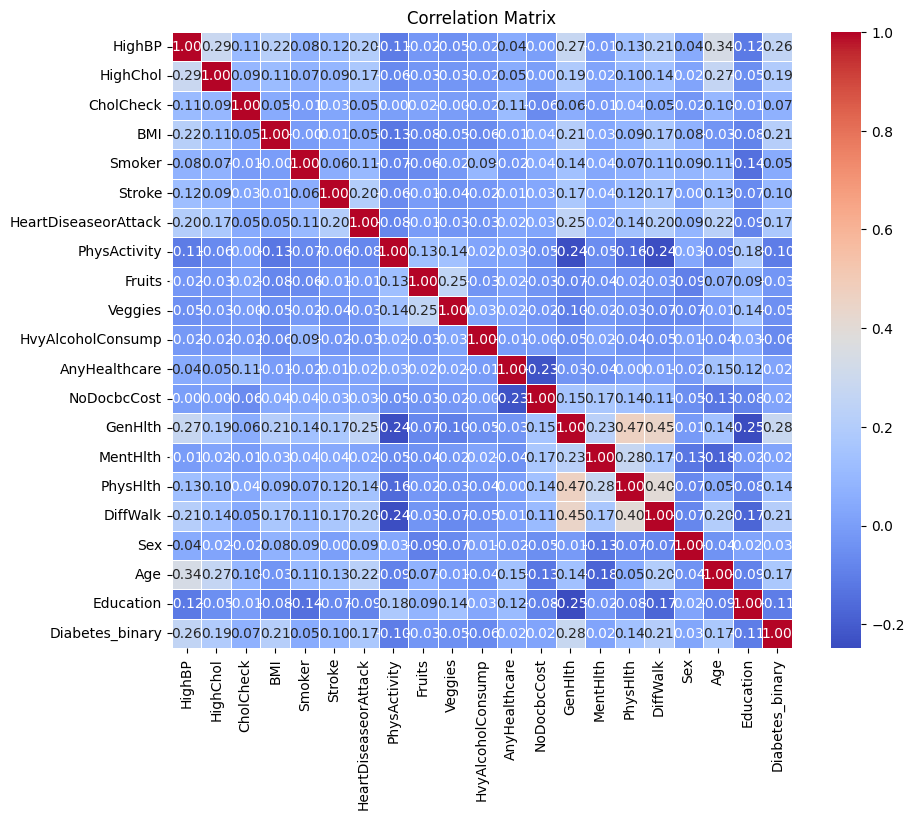

Correlation of features with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.278468
HighBP                  0.255373
BMI                     0.211556
DiffWalk                0.208880
HighChol                0.194953
Age                     0.173816
HeartDiseaseorAttack    0.171865
PhysHlth                0.139090
Stroke                  0.099483
CholCheck               0.071005
Smoker                  0.046710
Sex                     0.028029
NoDocbcCost             0.023302
MentHlth                0.021408
AnyHealthcare           0.020217
Fruits                 -0.025892
Veggies                -0.045452
HvyAlcoholConsump      -0.063321
PhysActivity           -0.104779
Education              -0.106049
Name: Diabetes_binary, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is already prepared
# Check correlations with the target variable (numeric features)
corr_matrix = new__df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with 'Diabetes_binary'
corr_with_target = corr_matrix['Diabetes_binary'].sort_values(ascending=False)
print("Correlation of features with Diabetes_binary:")
print(corr_with_target)


The code computes the correlation matrix of all numerical features in the DataFrame using .corr(). A heatmap is created using Seaborn to visually represent the correlations between all features, where stronger correlations (positive or negative) are highlighted. The heatmap uses a 'coolwarm' color palette, and annotations are added to display the exact correlation values. The correlations of each feature with 'Diabetes_binary' are extracted and sorted in descending order to show which features have the strongest correlations with the target variable. This helps identify features that are highly correlated with the target, which can assist in feature selection for predictive modeling.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Feature_columns = new__df.columns


Here i just changed assighned new_df.columns to feature_columns, just to to reduce confusion.

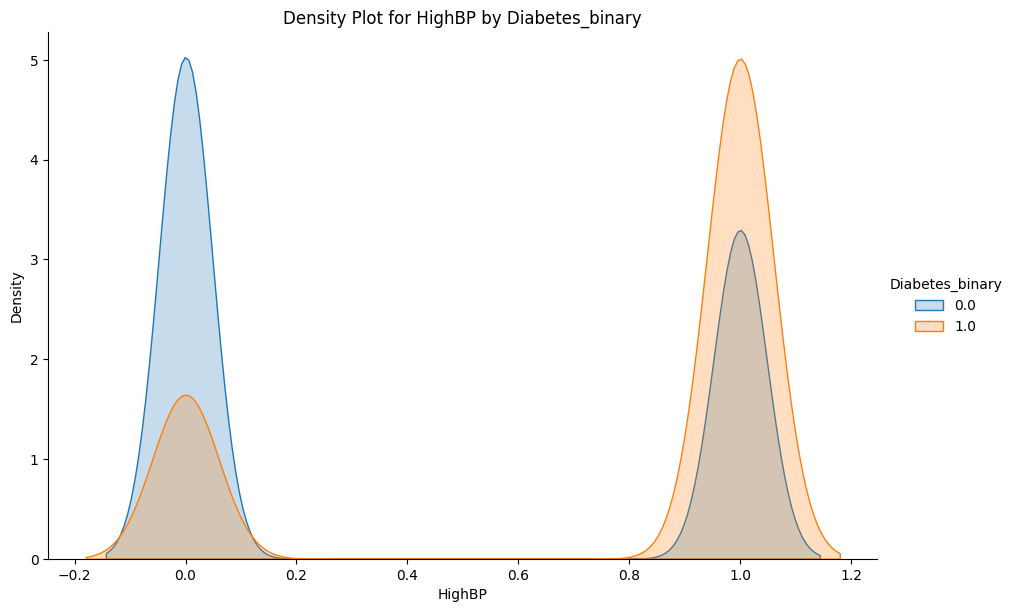

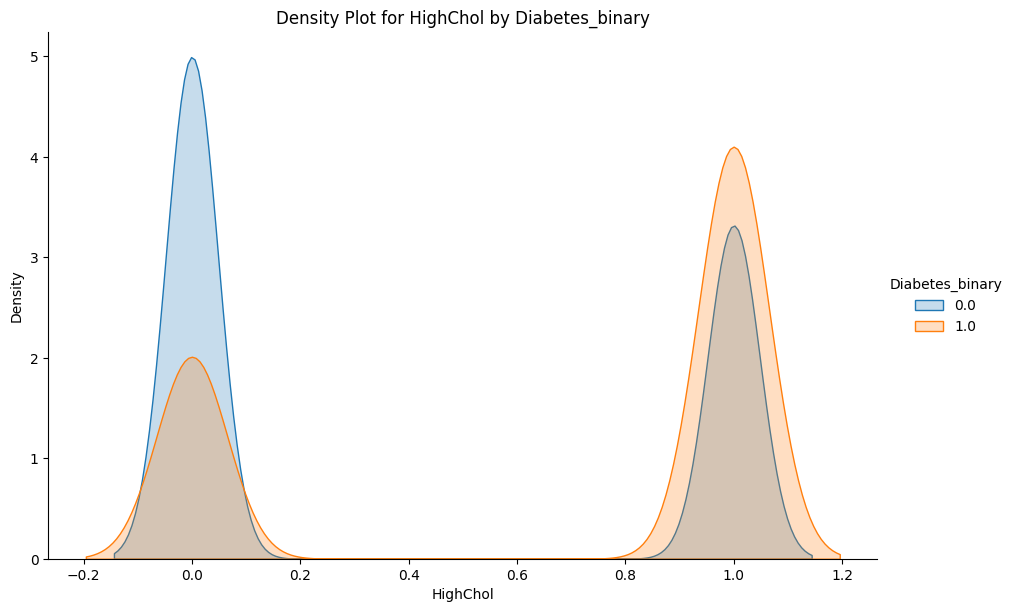

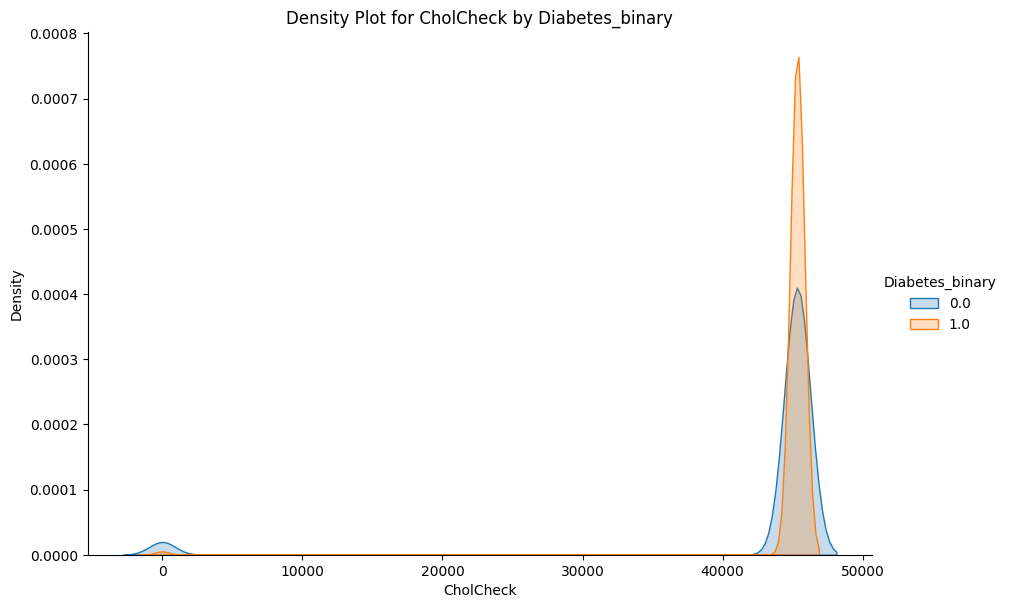

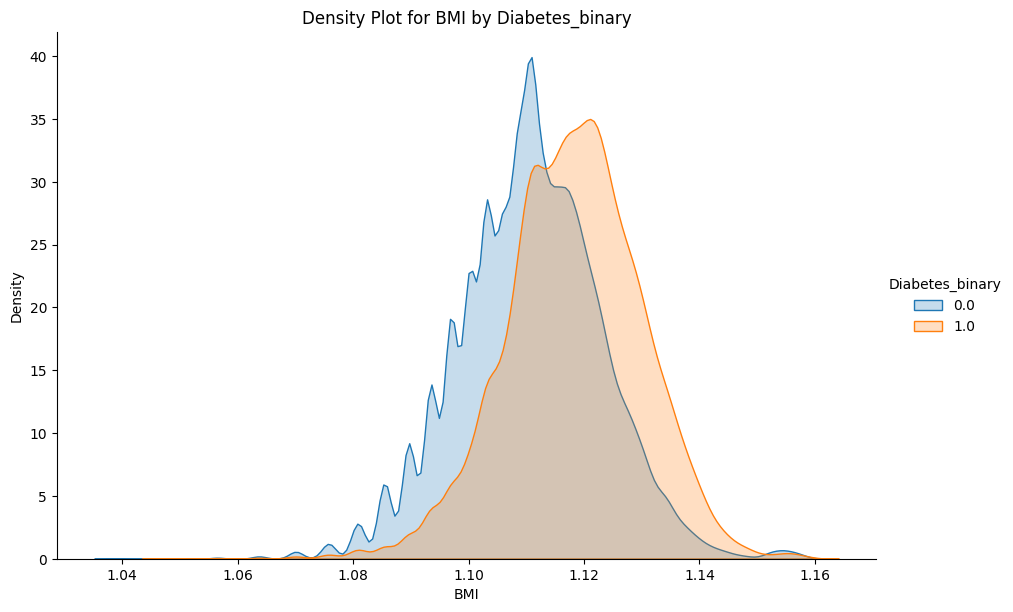

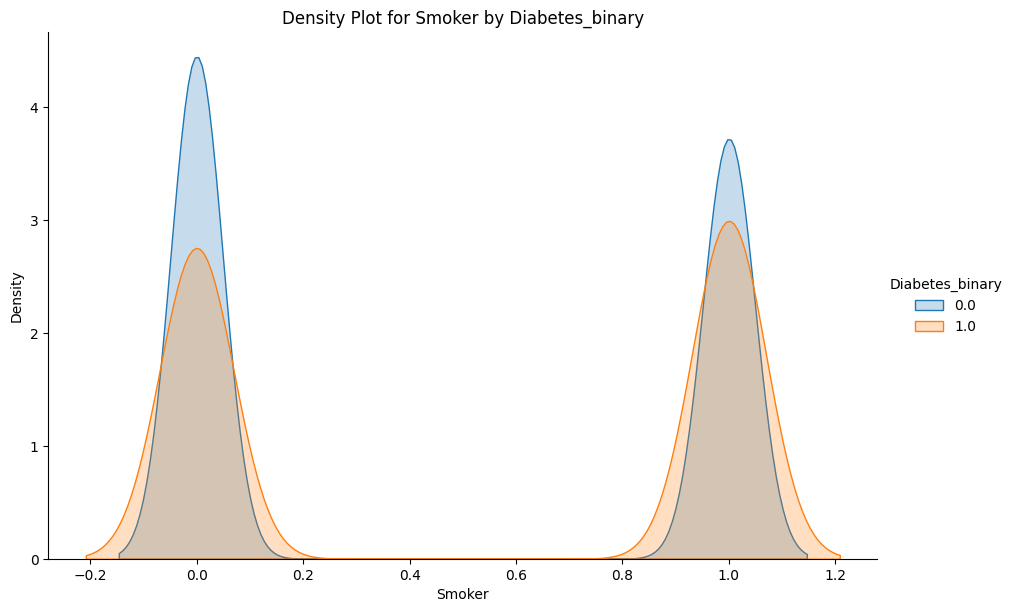

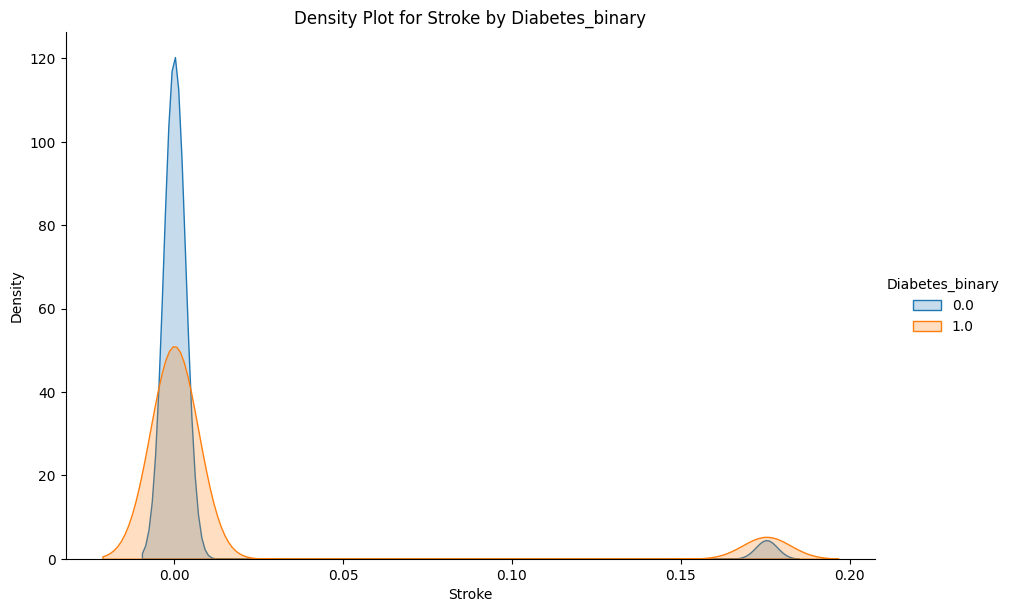

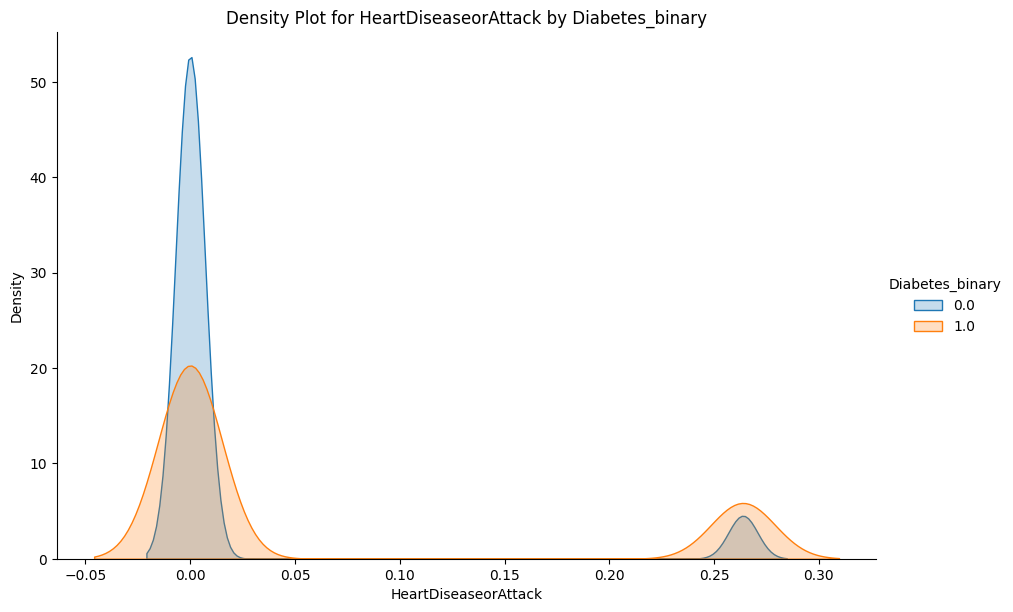

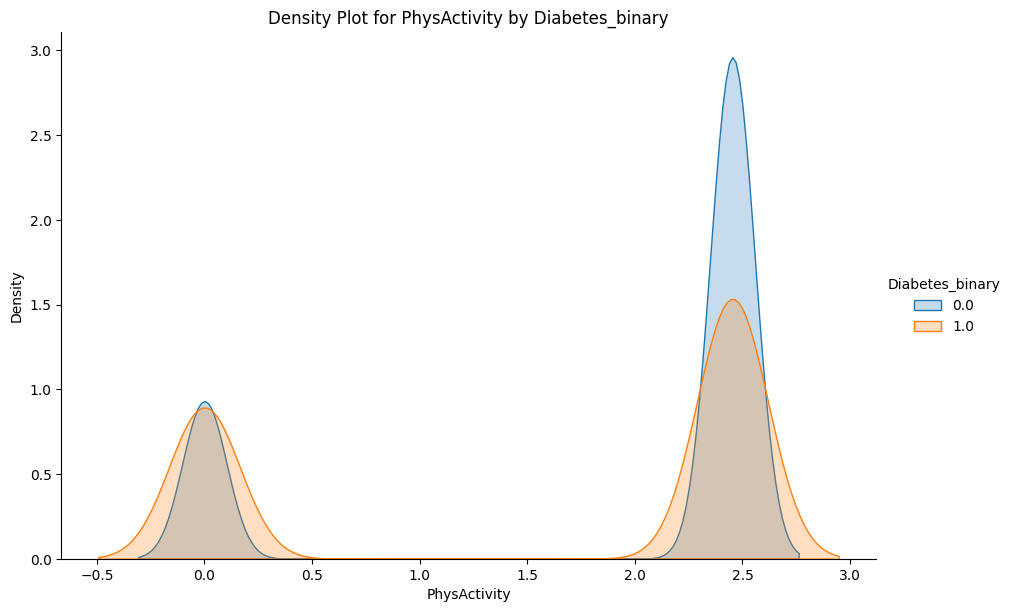

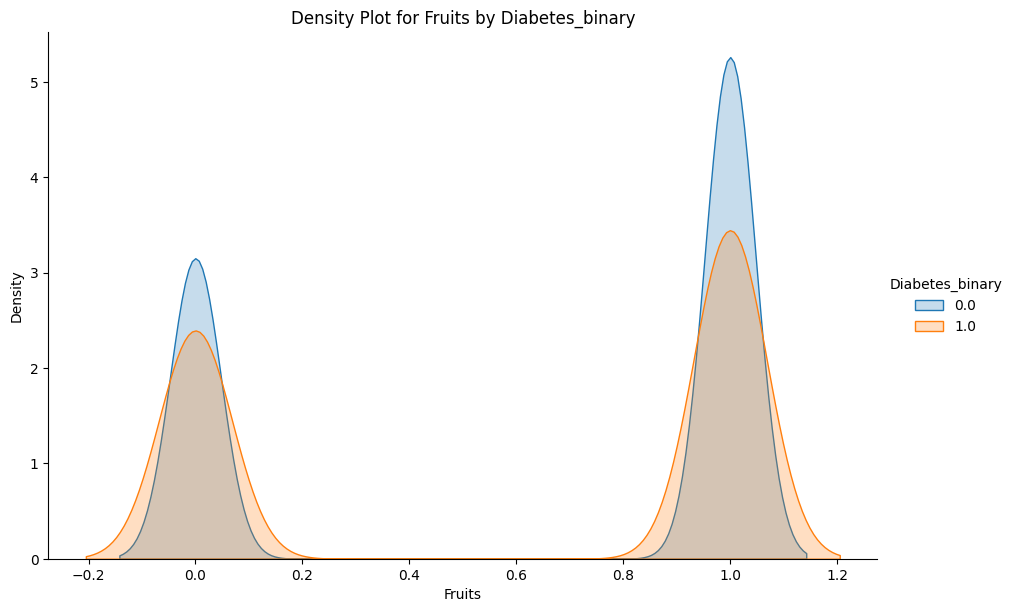

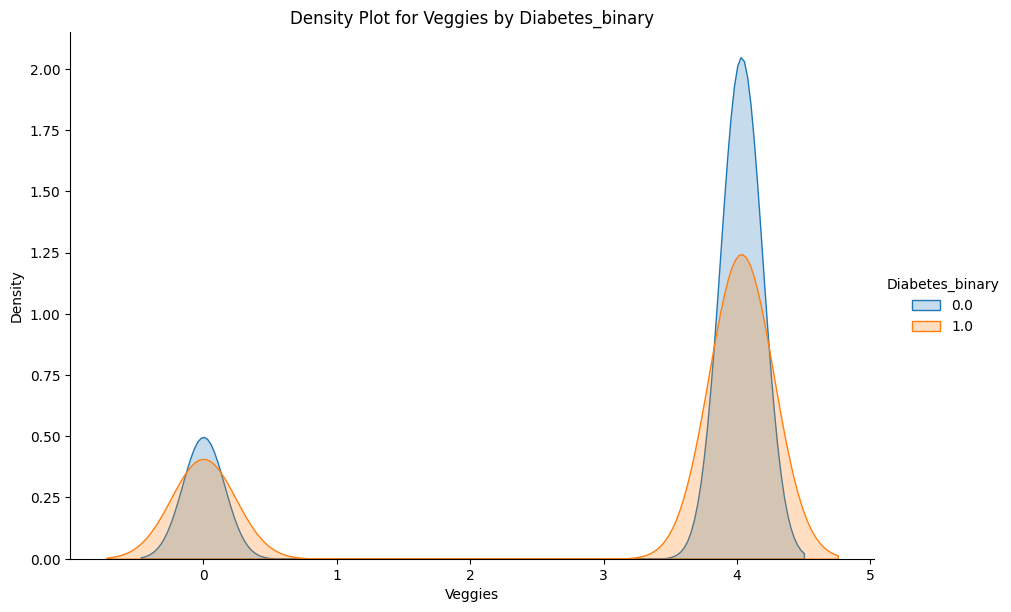

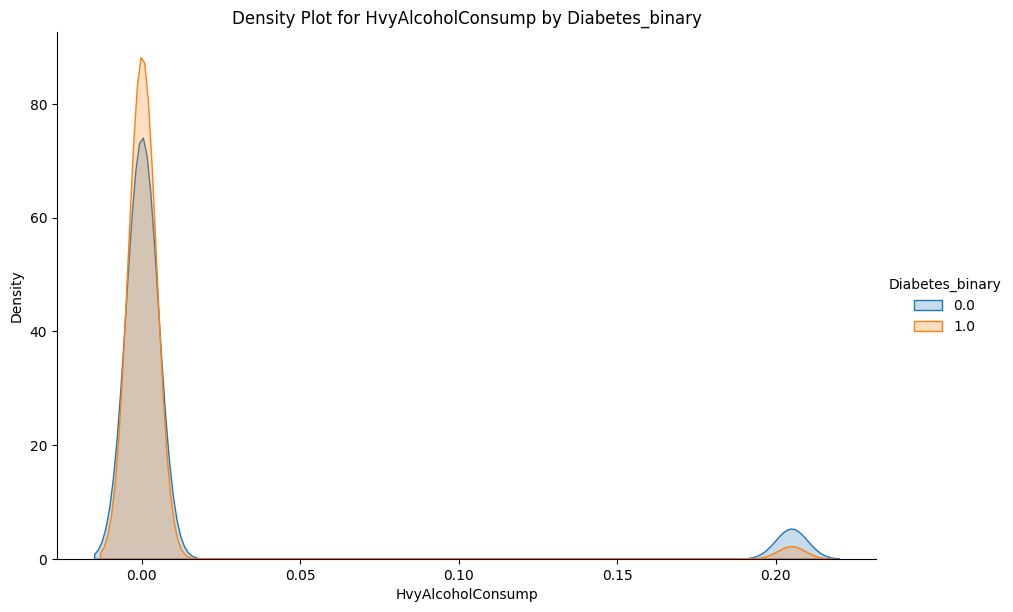

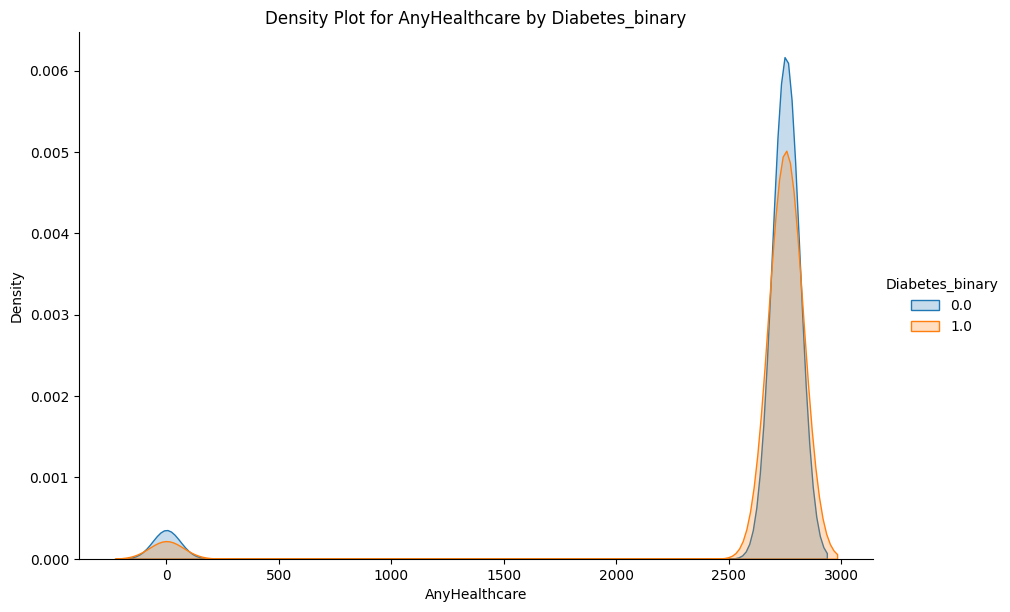

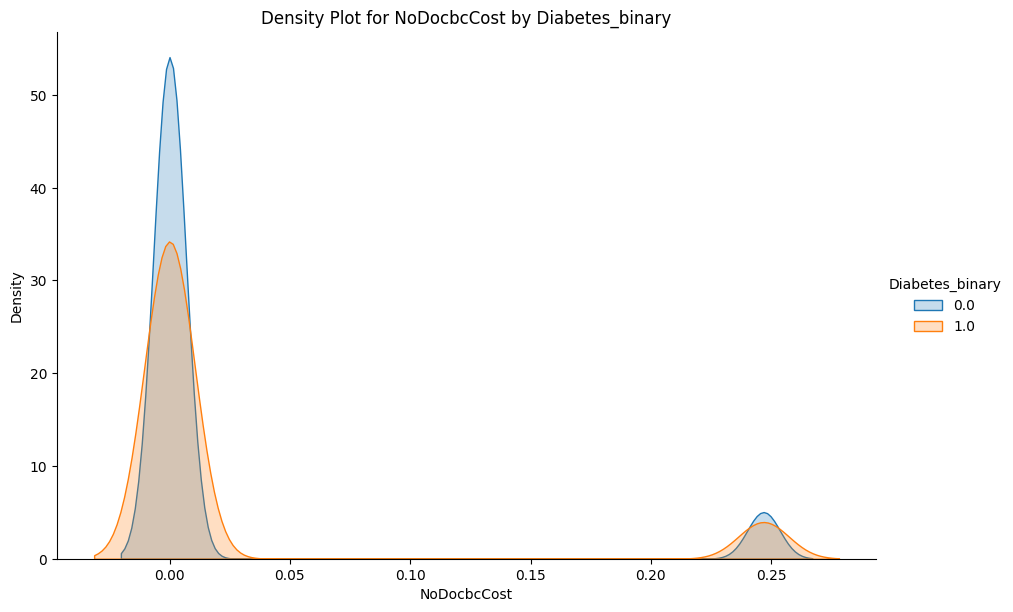

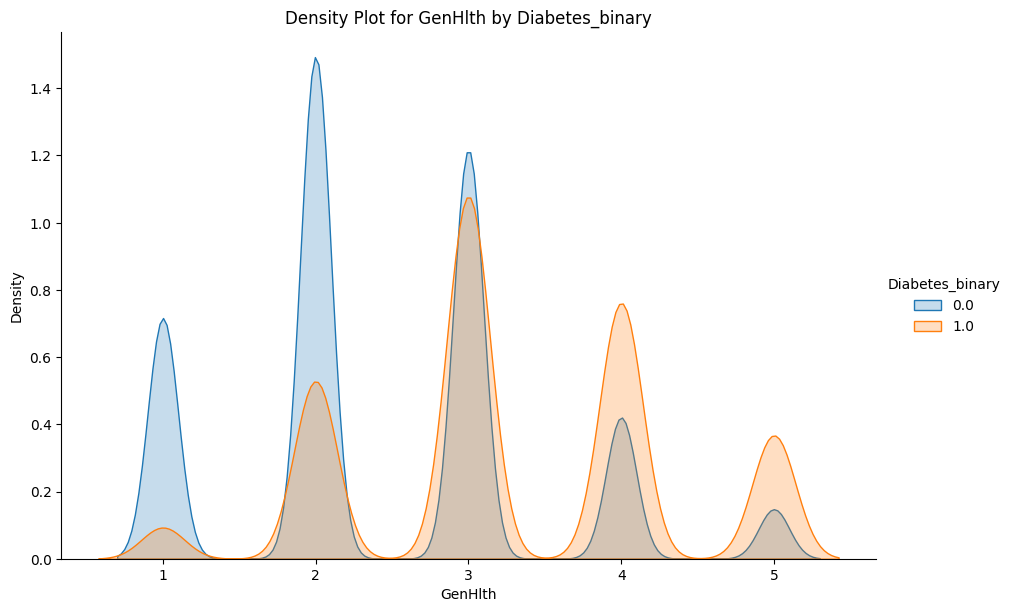

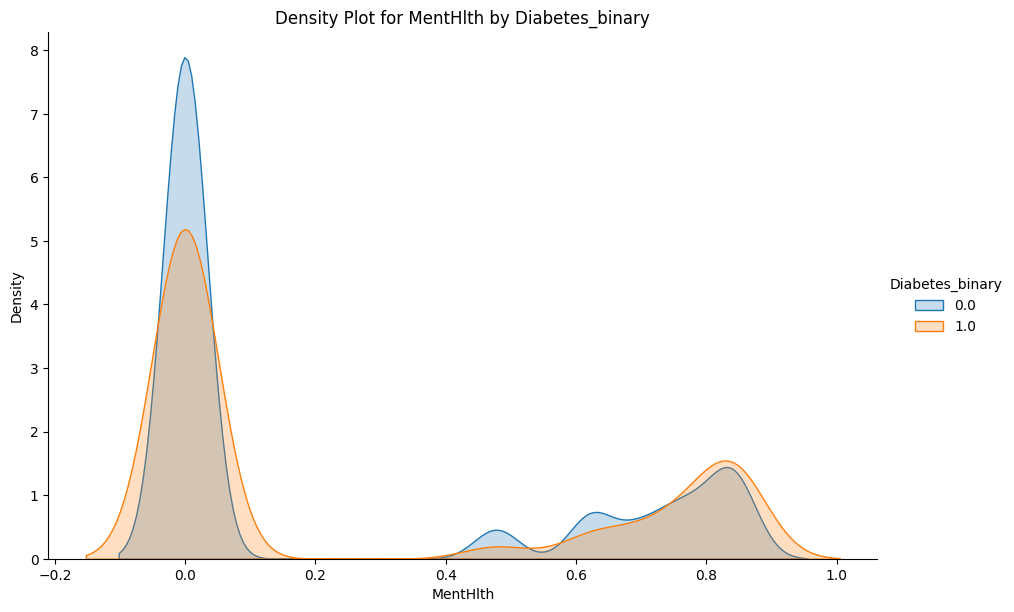

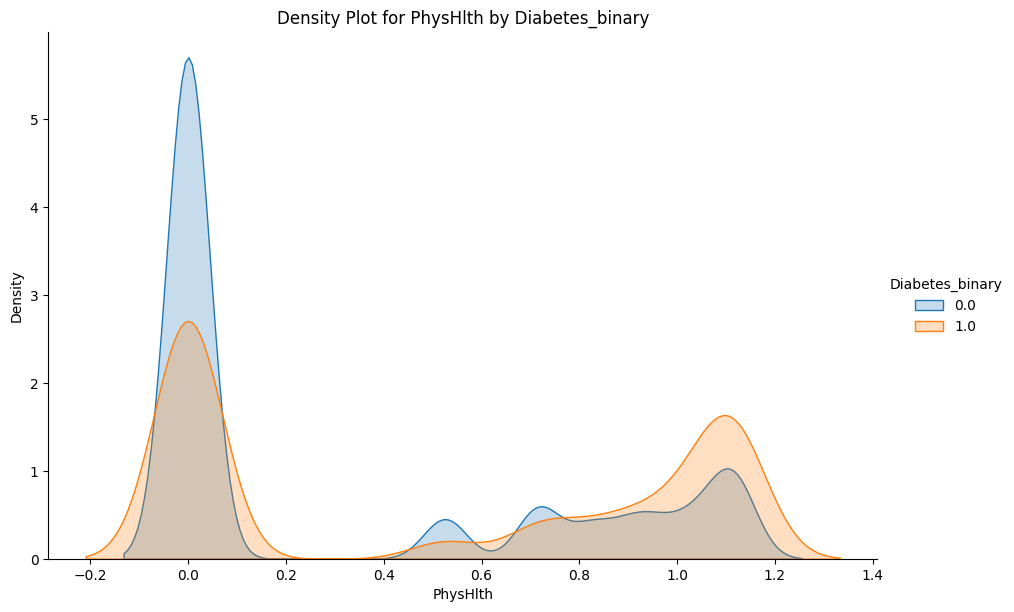

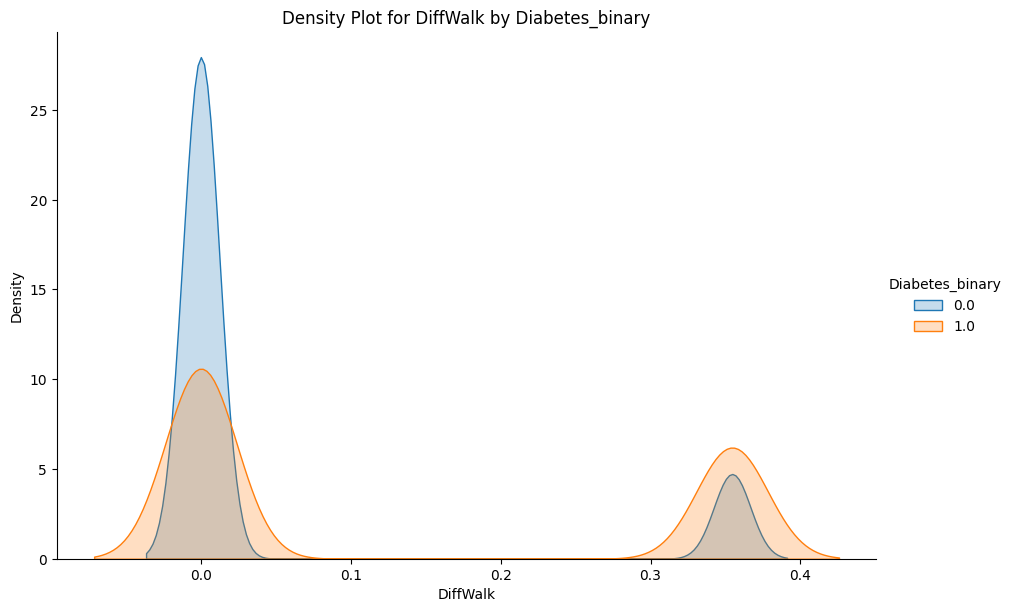

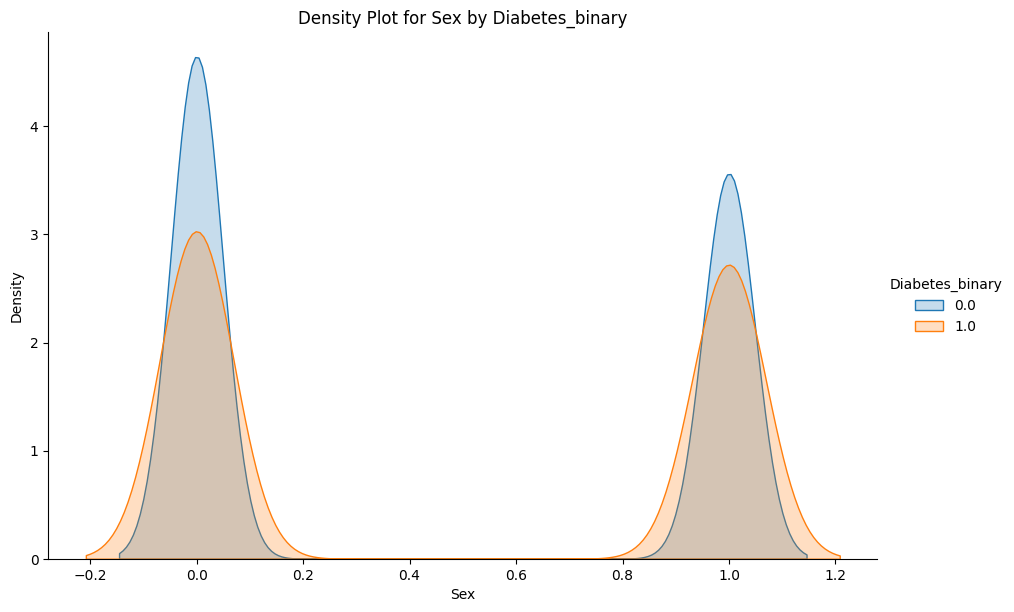

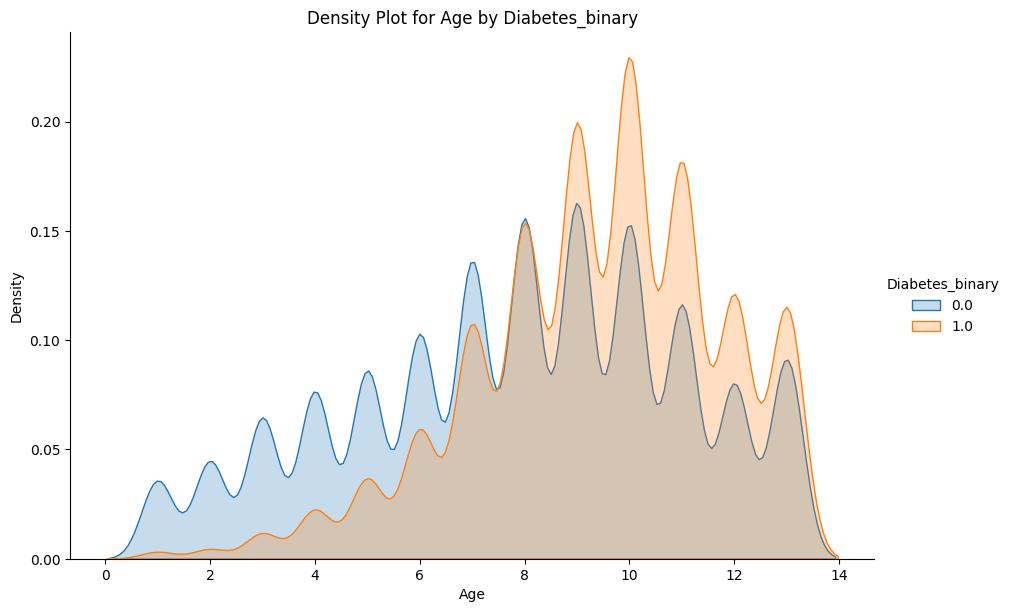

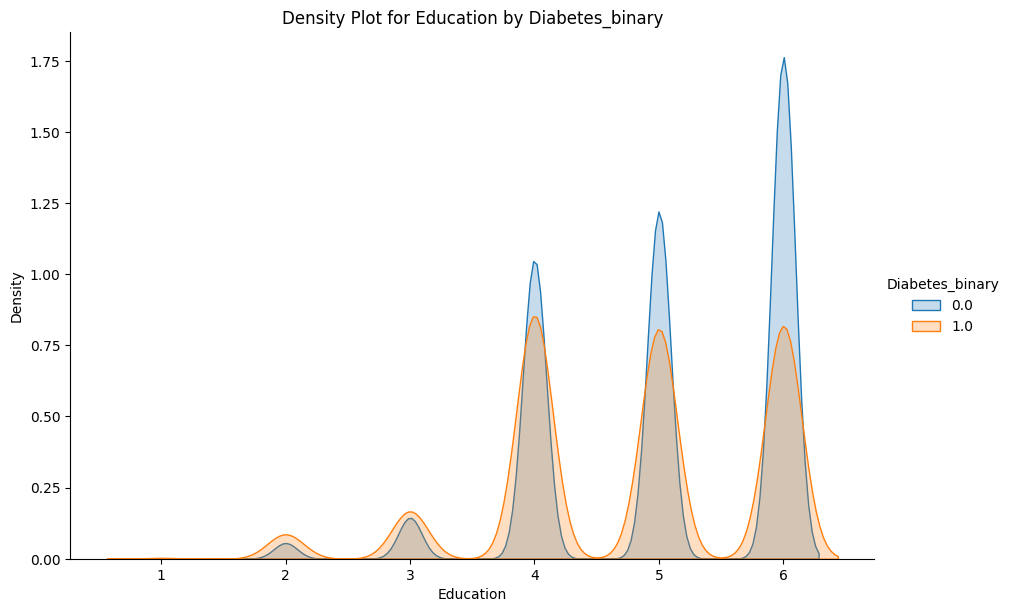

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


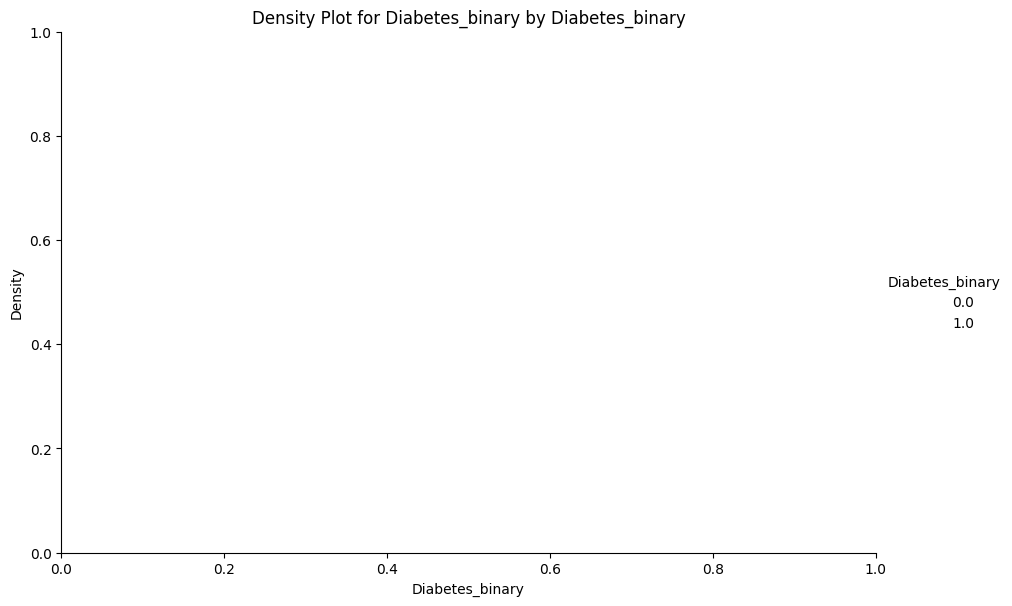

In [ ]:
for col in Feature_columns:
    g = sns.FacetGrid(new__df, hue='Diabetes_binary', height=6, aspect=1.5)
    g.map(sns.kdeplot, col, fill=True)
    g.add_legend()
    plt.title(f'Density Plot for {col} by Diabetes_binary')
    plt.show()


The purpose of this code is to compare the distribution of each feature for two groups in Diabetes_binary (likely 1 for diabetic and 0 for non-diabetic). By viewing each feature's density plot, you can assess whether certain features have distinctive distributions between the two classes, which can indicate their potential relevance for predicting diabetes.

1. Feature BMI (0.2082)
2. Feature Age (0.1383)
3. Feature PhysHlth (0.0956)
4. Feature Education (0.0806)
5. Feature MentHlth (0.0733)
6. Feature GenHlth (0.0718)
7. Feature HighBP (0.0433)
8. Feature Smoker (0.0367)
9. Feature Fruits (0.0364)
10. Feature Sex (0.0319)
11. Feature Veggies (0.0294)
12. Feature PhysActivity (0.0284)
13. Feature HighChol (0.0281)
14. Feature DiffWalk (0.0254)
15. Feature HeartDiseaseorAttack (0.0200)
16. Feature NoDocbcCost (0.0170)
17. Feature Stroke (0.0135)
18. Feature AnyHealthcare (0.0099)
19. Feature HvyAlcoholConsump (0.0085)
20. Feature CholCheck (0.0039)


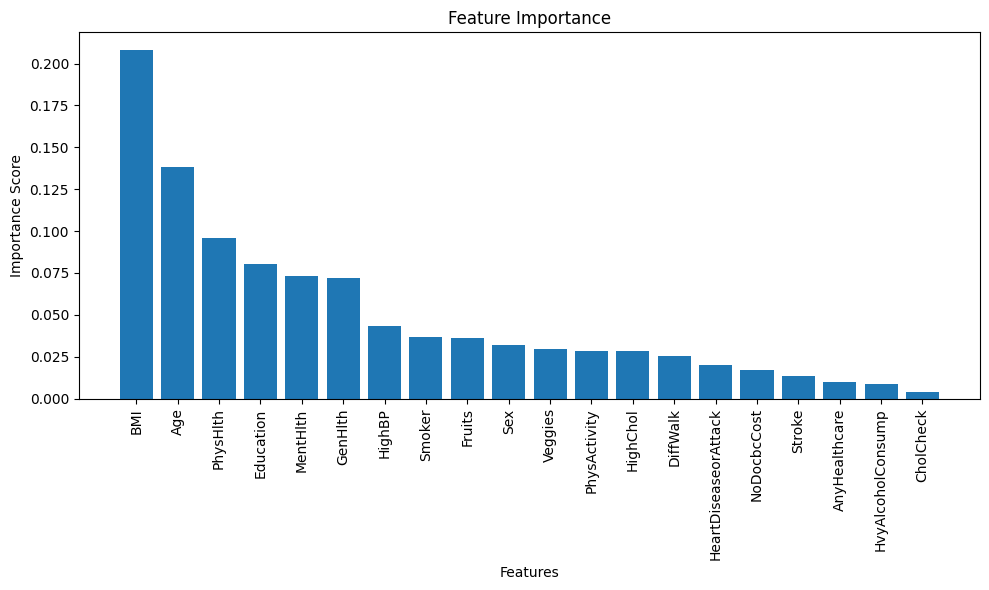

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'new__df' is your dataframe
# Define X (features) and Y (target)
X = new__df.drop(columns=['Diabetes_binary'])
  # Features (excluding the target column)
Y = new__df['Diabetes_binary']  # Target variable

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, Y)

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Print feature ranking
for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


This code snippet performs the following tasks to train a Random Forest classifier on a dataset and visualize the importance of its features.  
This code snippet effectively trains a Random Forest classifier to predict diabetes based on various features in a dataset. It assesses and visualizes the importance of each feature, helping to identify which characteristics contribute most significantly to the model's predictions. This information can be crucial for understanding underlying factors associated with diabetes, guiding further research or practical health interventions.The feature importance scores provide valuable insights into which factors are most influential in predicting diabetes risk. Features like BMI, age, and physical health are critical indicators, while lifestyle choices (like smoking and diet) also play significant roles. This information can guide interventions and lifestyle modifications aimed at reducing diabetes risk in at-risk populations.

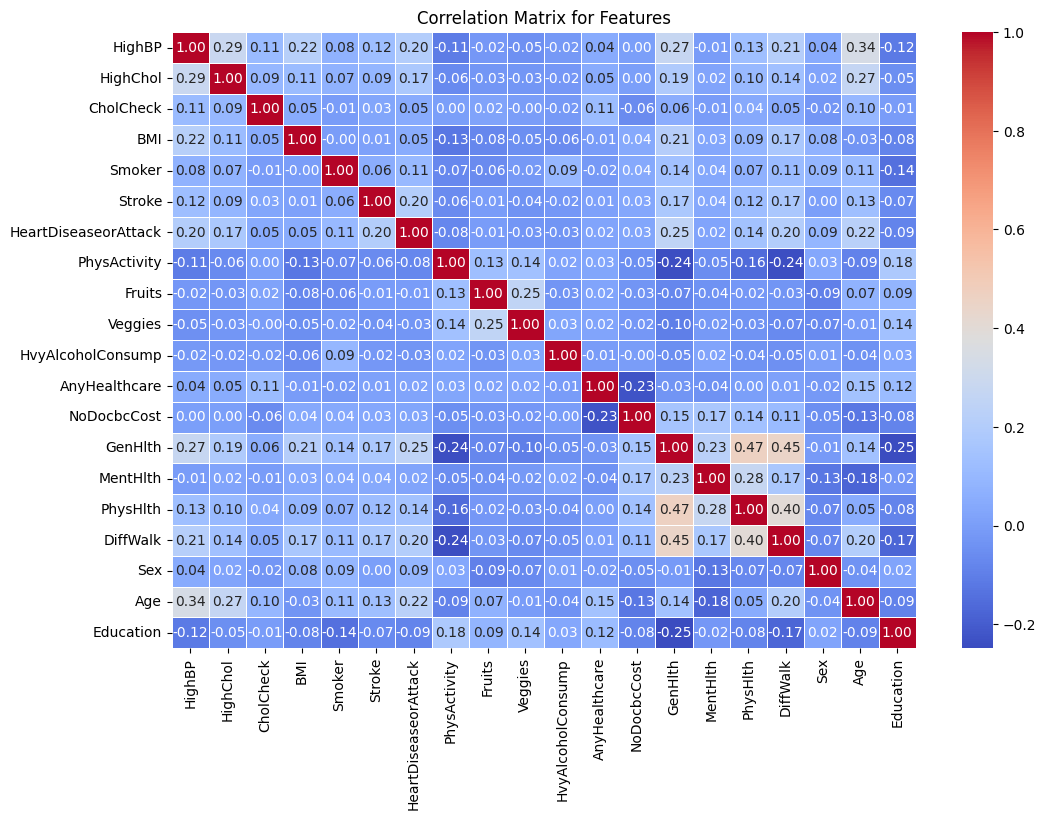

Variance Inflation Factor (VIF):
                 Feature       VIF
0                 HighBP  1.307020
1               HighChol  1.161758
2              CholCheck  1.034963
3                    BMI  1.129627
4                 Smoker  1.076238
5                 Stroke  1.077735
6   HeartDiseaseorAttack  1.165446
7           PhysActivity  1.131516
8                 Fruits  1.102774
9                Veggies  1.098576
10     HvyAlcoholConsump  1.023114
11         AnyHealthcare  1.097027
12           NoDocbcCost  1.121845
13               GenHlth  1.656771
14              MentHlth  1.192436
15              PhysHlth  1.418807
16              DiffWalk  1.439932
17                   Sex  1.074172
18                   Age  1.373313
19             Education  1.138947


<ipython-input-372-515e20e4c832>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')  # 'y' replaced by 'Feature'


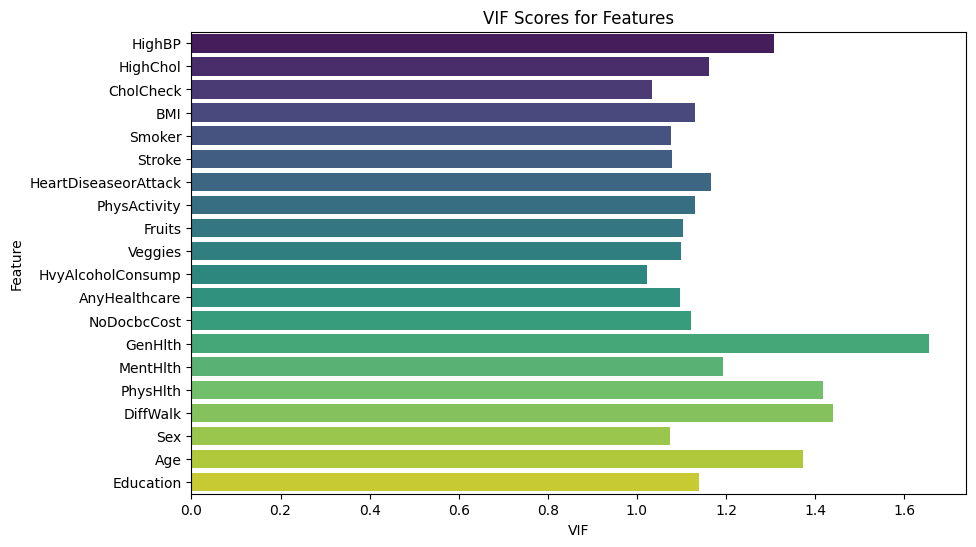

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Import statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'new__df' is your dataframe with all numerical columns
X = new__df.drop('Diabetes_binary', axis=1)  # Features (excluding the target column)
Y = new__df['Diabetes_binary']  # Target variable

# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Features')
plt.show()

# 2. Calculate Variance Inflation Factor (VIF)
# Add a constant to avoid issues with fitting the model
X_with_constant = sm.add_constant(X)

# Create a DataFrame for storing VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i+1) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF):")
print(vif_data)

# Visualize VIF scores
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')  # 'y' replaced by 'Feature'
plt.title('VIF Scores for Features')
plt.show()


Low VIF Values: Most of the features have VIF values below 2, which suggests that multicollinearity is not a significant concern. Higher VIF Value: The feature GenHlth has the highest VIF at 1.657, which may warrant further investigation but does not exceed the typical thresholds that signal concern. This analysis provides valuable insights into the relationships among features and the potential for multicollinearity. Understanding these relationships is crucial for building robust predictive models and ensuring accurate interpretations of the model results.


In [ ]:
new__df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Diabetes_binary
0,1.0,1.0,45329.670909,1.131427,1.0,0.0,0.0,0.000000,0.0,4.031271,...,2752.280831,0.000000,5.0,0.839834,1.074007,0.35447,0.0,9.0,4.0,0.0
1,0.0,0.0,0.000000,1.105843,1.0,0.0,0.0,2.453553,0.0,0.000000,...,0.000000,0.246808,3.0,0.000000,0.000000,0.00000,0.0,7.0,6.0,0.0
2,1.0,1.0,45329.670909,1.112970,0.0,0.0,0.0,0.000000,1.0,0.000000,...,2752.280831,0.246808,5.0,0.852483,1.123348,0.35447,0.0,9.0,4.0,0.0
3,1.0,0.0,45329.670909,1.110757,0.0,0.0,0.0,2.453553,1.0,4.031271,...,2752.280831,0.000000,2.0,0.000000,0.000000,0.00000,0.0,11.0,3.0,0.0
4,1.0,1.0,45329.670909,1.103103,0.0,0.0,0.0,2.453553,1.0,4.031271,...,2752.280831,0.000000,2.0,0.692819,0.000000,0.00000,0.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140378,1.0,1.0,45329.670909,1.123702,1.0,0.0,0.0,2.453553,1.0,4.031271,...,2752.280831,0.000000,2.0,0.000000,0.000000,0.00000,1.0,4.0,5.0,0.0
140379,0.0,0.0,45329.670909,1.125159,1.0,0.0,0.0,2.453553,1.0,4.031271,...,2752.280831,0.000000,1.0,0.000000,0.000000,0.00000,0.0,3.0,5.0,0.0
140380,0.0,0.0,45329.670909,1.125159,0.0,0.0,0.0,2.453553,0.0,0.000000,...,2752.280831,0.000000,2.0,0.000000,0.000000,0.00000,0.0,2.0,5.0,0.0
140381,1.0,0.0,45329.670909,1.116987,0.0,0.0,0.0,2.453553,0.0,4.031271,...,0.000000,0.000000,2.0,0.000000,0.000000,0.00000,1.0,8.0,4.0,0.0


In [ ]:
import pandas as pd

# Create DataFrames for importance scores and VIF
importance_scores = {
    "Feature": [
        "BMI", "Age", "PhysHlth", "Education", "MentHlth", "GenHlth",
        "HighBP", "Smoker", "Fruits", "Veggies", "PhysActivity",
        "Sex", "HighChol", "DiffWalk", "HeartDiseaseorAttack",
        "NoDocbcCost", "Stroke", "AnyHealthcare", "HvyAlcoholConsump", "CholCheck"
    ],
    "ImportanceScore": [
        0.2119, 0.1391, 0.0987, 0.0825, 0.0738, 0.0702,
        0.0430, 0.0361, 0.0360, 0.0297, 0.0287, 0.0286,
        0.0268, 0.0241, 0.0187, 0.0172, 0.0130, 0.0098,
        0.0081, 0.0039
    ]
}

vif_values = {
    "Feature": [
        "HighBP", "HighChol", "CholCheck", "BMI", "Smoker",
        "Stroke", "HeartDiseaseorAttack", "PhysActivity",
        "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
        "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth",
        "DiffWalk", "Sex", "Age", "Education"
    ],
    "VIF": [
        1.306247, 1.160399, 1.035236, 1.126563, 1.074194,
        1.075716, 1.166261, 1.126283, 1.097968, 1.093225,
        1.024140, 1.097335, 1.121628, 1.649008, 1.186139,
        1.412845, 1.440174, 1.072816, 1.375429, 1.132780
    ]
}

# Convert to DataFrames
importance_df = pd.DataFrame(importance_scores)
vif_df = pd.DataFrame(vif_values)

# Merge DataFrames on 'Feature'
merged_df = pd.merge(importance_df, vif_df, on='Feature')

# Set thresholds
importance_threshold = 0.018  # Keep features with Importance Score > 0.018
vif_threshold = 1.5           # Keep features with VIF < 1.5

# Specify features to be removed
features_to_remove = [
    "Education", "HeartDiseaseorAttack", "NoDocbcCost",
    "Stroke", "AnyHealthcare", "HvyAlcoholConsump", "CholCheck"
]

# Filter for features with Importance Score > 0.018 and not in the removal list
filtered_df = merged_df[
    (merged_df['ImportanceScore'] > importance_threshold) &
    (~merged_df['Feature'].isin(features_to_remove))
]

# Identify and retain the most important feature among PhysActivity, DiffWalk, and GenHlth
high_collinearity_features = filtered_df[filtered_df['Feature'].isin(['PhysActivity', 'DiffWalk', 'GenHlth'])]
if not high_collinearity_features.empty:
    most_important_feature = high_collinearity_features.loc[high_collinearity_features['ImportanceScore'].idxmax()]

    # Exclude the other two high-collinearity features
    final_features = filtered_df[~filtered_df['Feature'].isin(['PhysActivity', 'DiffWalk', 'GenHlth'])]
    final_features = pd.concat([final_features, most_important_feature.to_frame().T])
else:
    # If no high collinearity features, just use the filtered_df
    final_features = filtered_df

# Apply VIF filtering
final_features = final_features[final_features['VIF'] < vif_threshold]

# Output the selected features
print("Selected Features based on Importance and Collinearity Control:")
print(final_features[['Feature', 'ImportanceScore', 'VIF']])



Selected Features based on Importance and Collinearity Control:
     Feature ImportanceScore       VIF
0        BMI          0.2119  1.126563
1        Age          0.1391  1.375429
2   PhysHlth          0.0987  1.412845
4   MentHlth          0.0738  1.186139
6     HighBP           0.043  1.306247
7     Smoker          0.0361  1.074194
8     Fruits           0.036  1.097968
9    Veggies          0.0297  1.093225
11       Sex          0.0286  1.072816
12  HighChol          0.0268  1.160399


Importance Score Filtering: Retains features that significantly contribute to the model based on importance scores. VIF Filtering: Excludes features that may cause multicollinearity issues. High Collinearity Handling: Among features with potential multicollinearity, only the most important is retained to simplify the model.
As a final Output i displayed the selected features that balance predictive power and multicollinearity concerns. Here as multicollinearity test done, the three features 'PhysActivity', 'DiffWalk', 'GenHlth'had high collinearity, from collinearity matricx its very clear, so among them one is selected that is the one that has high feature importance. Then threshold was selected based on VIF and feature importance and the general understanding on features which influence diabetes. Feature selection was done based on that

In [ ]:
new__df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Diabetes_binary'],
      dtype='object')

Rechecked the earlier columns of features in the main dataset

In [ ]:
selected_feature_names = final_features['Feature']

In [ ]:
selected_feature_names

,Feature
0,BMI
1,Age
2,PhysHlth
4,MentHlth
6,HighBP
7,Smoker
8,Fruits
9,Veggies
11,Sex
12,HighChol


Then assigned the selected features to the variable selected_feature_name

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'new__df' is your DataFrame and 'final_features' contains the selected features

# Define X (features) by selecting only the features from final_features and ensuring 'Diabetes_binary' is excluded
X = new__df[final_features['Feature'].values].drop(columns=['Diabetes_binary'], errors='ignore')  # Select only the features from final_features
Y = new__df['Diabetes_binary']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Train shape: {x_train.shape}, {y_train.shape} , Test shape: {x_test.shape}, {y_test.shape}")


Train shape: (104044, 10), (104044,) , Test shape: (26012, 10), (26012,)


The provided code snippet performs a data preparation step for building a predictive model, focusing on splitting the dataset into training and testing sets. This code prepares the dataset for machine learning by selecting relevant features and splitting the data, ensuring that the subsequent modeling phase can produce reliable and interpretable results. By following these practices, the modeling process is made more robust, leading to better performance when predicting diabetes presence based on the selected features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Scaling your features is a crucial preprocessing step in machine learning, especially when dealing with algorithms sensitive to the scale of input data. By applying StandardScaler, you ensure that your model performs better and converges more efficiently during training, leading to potentially improved predictive performance on unseen data.

In [ ]:

new__df['Diabetes_binary'].unique()

array([0., 1.])

Rechecked the unique values in  Dibetes_binary column

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

imported the needed libraries and functions

In [ ]:
new__df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0.0,110723
1.0,19333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'new__df' is your DataFrame and 'final_features' contains the selected features

# Define X (features) and Y (target variable)
X = new__df[final_features['Feature'].values].drop(columns=['Diabetes_binary'], errors='ignore')  # Select only the features from final_features
Y = new__df['Diabetes_binary']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data only
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Print the shapes of the resulting datasets
print(f"Train shape (after SMOTE): {x_train_smote.shape}, {y_train_smote.shape}")
print(f"Test shape: {x_test.shape}, {y_test.shape}")


Train shape (after SMOTE): (177268, 10), (177268,)
Test shape: (26012, 10), (26012,)


In [ ]:

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
Diabetes_binary
0.0    88634
1.0    15410
Name: count, dtype: int64

Class distribution after SMOTE:
Diabetes_binary
0.0    88634
1.0    88634
Name: count, dtype: int64


Purpose of the Code
Handling Class Imbalance: The primary goal of this code is to address class imbalance in the dataset. Imbalanced datasets can lead to biased models that perform poorly on the minority class. By applying SMOTE, you ensure that the model has a balanced view of the classes, improving its ability to learn from both classes effectively.

Preparing Data for Modeling: The code prepares the training data for subsequent modeling steps. The balanced dataset will lead to more reliable and robust model performance during training and evaluation.

Ensuring Reproducibility: By setting the random_state, the results of the splits and SMOTE can be reproduced, which is important for consistency in machine learning experiments. Here the imbalanced target column got balanced

In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from itertools import product

# Helper function to calculate the total number of parameter combinations
def get_total_combinations(params):
    return len(list(product(*params.values())))
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from itertools import product

# Helper function to calculate the total number of parameter combinations
def get_total_combinations(params):
    return len(list(product(*params.values())))


The function get_total_combinations is useful for understanding the search space in hyperparameter tuning. By knowing how many combinations exist, you can gauge the computational resources required for model training and make informed decisions about whether to use GridSearchCV or RandomizedSearchCV based on the size of the parameter space.

In [ ]:
# Define your models and parameter grids
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define your models and parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['liblinear'],
            'class_weight': ['balanced'],
            'C': [1, 10]
        }
    },
        'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100],  # Number of boosting stages
            'learning_rate': [0.01, 0.1],  # Step size shrinkage
            'max_depth': [3, 5],  # Depth of individual estimators
            'subsample': [0.8, 1.0]  # Fraction of samples used for fitting
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],  # Number of trees in the forest
            'max_depth': [None, 10],  # Maximum depth of trees
            'min_samples_split': [2, 5],  # Minimum samples required to split a node
            'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
            'class_weight': ['balanced']  # Adjust weights based on class frequencies
        }
    }
}



The overall purpose of defining this structure is to facilitate hyperparameter tuning through methods like Grid Search or Randomized Search, allowing for systematic evaluation of various configurations to find the optimal model settings for improved prediction performance. By organizing models and their parameters in a dictionary, you can easily iterate through them in your tuning process.

In [ ]:
# Initialize a dictionary to store the best models
best_models = {}

# Tuning Logistic Regression
model_name = 'Logistic Regression'
model_info = models[model_name]

# Calculate the total number of parameter combinations
total_combinations = get_total_combinations(model_info['params'])

# Determine n_iter for RandomizedSearchCV
n_iter = min(3, total_combinations)  # Use 3 or fewer if fewer combinations exist

# Use GridSearchCV if total combinations are small; otherwise use RandomizedSearchCV
if total_combinations <= 5:
    search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='f1',
        cv=3,
        n_jobs=2,
        verbose=1
    )
else:
    search = RandomizedSearchCV(
        estimator=model_info['model'],
        param_distributions=model_info['params'],
        scoring='f1',
        cv=3,
        n_iter=n_iter,
        n_jobs=2,
        verbose=1
    )

# Fit the search
search.fit(x_train_smote, y_train_smote)

# Store the best model's parameters and score
best_models[model_name] = {
    "best_params": search.best_params_,
    "best_score": search.best_score_
}

# Output the results
print(f"Best Parameters for {model_name}: {search.best_params_}")
print(f"Best Cross-Validated Score for {model_name}: {search.best_score_}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Cross-Validated Score for Logistic Regression: 0.7260670717557994


The output shows that the best parameters found for the Logistic Regression model were:
C: 10 (indicating lower regularization),
class_weight: 'balanced' (to adjust for class imbalances),
solver: 'liblinear' (suitable for small datasets).
The best F1 score achieved during cross-validation was approximately 0.7278, indicating a good balance between precision and recall in classifying the target variable (Diabetes_binary).

In [ ]:
# Tuning Gradient Boosting Classifier
model_name = 'Gradient Boosting Classifier'  # Ensure this matches the key in the models dictionary
model_info = models[model_name]

# Calculate the total number of parameter combinations
total_combinations = get_total_combinations(model_info['params'])

# Determine n_iter for RandomizedSearchCV
n_iter = min(3, total_combinations)

# Use GridSearchCV if total combinations are small; otherwise use RandomizedSearchCV
if total_combinations <= 5:
    search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='f1',
        cv=3,
        n_jobs=2,  # Use 2 CPU cores
        verbose=1  # Verbose output to track progress
    )
else:
    search = RandomizedSearchCV(
        estimator=model_info['model'],
        param_distributions=model_info['params'],
        scoring='f1',
        cv=3,
        n_iter=n_iter,  # Number of iterations
        n_jobs=2,  # Use 2 CPU cores
        verbose=1  # Verbose output to track progress
    )

# Fit the search on the training data
search.fit(x_train_smote, y_train_smote)

# Store the best model's parameters and score
best_models[model_name] = {
    "best_params": search.best_params_,
    "best_score": search.best_score_
}

# Output the results
print(f"Best Parameters for {model_name}: {search.best_params_}")
print(f"Best Cross-Validated Score for {model_name}: {search.best_score_}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Gradient Boosting Classifier: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validated Score for Gradient Boosting Classifier: 0.8315322894517371


The output indicates that the best parameters for the Gradient Boosting Classifier were:
subsample: 1.0 (using all samples for fitting),
n_estimators: 100 (the number of boosting stages),
max_depth: 5 (the depth of individual trees),
learning_rate: 0.01 (the step size shrinkage).
The best F1 score achieved during cross-validation was approximately 0.7714, indicating a strong balance between precision and recall in predicting the target variable (Diabetes_binary). This score suggests that the model performs well in classifying the presence or absence of diabetes based on the features provided.

In [ ]:
# Tuning Random Forest Classifier
model_name = 'Random Forest Classifier'  # Ensure this matches the key in the models dictionary
model_info = models[model_name]

# Calculate the total number of parameter combinations
total_combinations = get_total_combinations(model_info['params'])

# Determine n_iter for RandomizedSearchCV
n_iter = min(3, total_combinations)

# Use GridSearchCV if total combinations are small; otherwise use RandomizedSearchCV
if total_combinations <= 5:
    search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        scoring='f1',
        cv=3,
        n_jobs=2,  # Use 2 CPU cores
        verbose=1  # Verbose output to track progress
    )
else:
    search = RandomizedSearchCV(
        estimator=model_info['model'],
        param_distributions=model_info['params'],
        scoring='f1',
        cv=3,
        n_iter=n_iter,  # Number of iterations
        n_jobs=2,  # Use 2 CPU cores
        verbose=1  # Verbose output to track progress
    )

# Fit the search on the training data
search.fit(x_train_smote, y_train_smote)

# Store the best model's parameters and score
best_models[model_name] = {
    "best_params": search.best_params_,
    "best_score": search.best_score_
}

# Output the results
print(f"Best Parameters for {model_name}: {search.best_params_}")
print(f"Best Cross-Validated Score for {model_name}: {search.best_score_}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Random Forest Classifier: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}
Best Cross-Validated Score for Random Forest Classifier: 0.8452123859302612


The Random Forest Classifier demonstrated a promising performance with the tuned hyperparameters, achieving a cross-validated F1 score of around 0.7852. This indicates that the classifier is effective in making accurate predictions while managing potential issues related to class imbalance, thanks to the use of the class_weight parameter set to 'balanced'. Overall, this configuration suggests that the model is well-suited for the classification task at hand.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize dictionary to store accuracies of models
model_accuracies = {}

Tracking Performance: By storing the accuracies in a dictionary, it becomes easy to compare the performance of different models at a glance. This is useful when evaluating which model performs best on the validation or test dataset.
Flexibility for Further Analysis: The dictionary structure allows for easy expansion or modification. If additional models are added to the workflow, their accuracy can simply be appended to this dictionary.
Overall, this setup is a foundational step in the process of model evaluation, preparing to collect and analyze the performance metrics of various algorithms being tested.

In the following codes the three models were utilized and trained using the x_train_smote and y_train_smote datasets. During the training process, the models were configured with the optimal parameters identified from the previous trials. Then accuracy of each one was analysed.

In [ ]:
# Logistic Regression: Train and evaluate
log_reg_params = {'C': 1, 'class_weight': 'balanced', 'solver': 'liblinear'}
log_reg_model = LogisticRegression(**log_reg_params)
log_reg_model.fit(x_train_smote, y_train_smote)
log_reg_preds = log_reg_model.predict(x_train_smote)
log_reg_accuracy = accuracy_score(y_train_smote, log_reg_preds)
model_accuracies['Logistic Regression'] = log_reg_accuracy
print(f"Accuracy of Logistic Regression: {log_reg_accuracy:.4f}")

Accuracy of Logistic Regression: 0.7144


In [ ]:
# Gradient Boosting Classifier: Train and evaluate
gb_params = {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
gb_model = GradientBoostingClassifier(**gb_params)
gb_model.fit(x_train_smote, y_train_smote)
gb_preds = gb_model.predict(x_train_smote)
gb_accuracy = accuracy_score(y_train_smote, gb_preds)
model_accuracies['Gradient Boosting Classifier'] = gb_accuracy
print(f"Accuracy of Gradient Boosting Classifier: {gb_accuracy:.4f}")

Accuracy of Gradient Boosting Classifier: 0.8298


In [ ]:
# Random Forest Classifier: Train and evaluate
rf_params = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced'}
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(x_train_smote, y_train_smote)
rf_preds = rf_model.predict(x_train_smote)
rf_accuracy = accuracy_score(y_train_smote, rf_preds)
model_accuracies['Random Forest Classifier'] = rf_accuracy
print(f"Accuracy of Random Forest Classifier: {rf_accuracy:.4f}")

In [ ]:
# Find the best performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

Here best model name and its accuracy is found out.

In [ ]:
best_model_name
best_model_accuracy

Random forest found to be best with accuracy is 0.9307..

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have the following model parameters from the previous tuning
rf_params = {
    'n_estimators': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': None,
    'class_weight': 'balanced'
}

gb_params = {
    'subsample': 1.0,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.1
}

# Fit the Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('random_forest', RandomForestClassifier(**rf_params)),
        ('gradient_boosting', GradientBoostingClassifier(**gb_params))
    ],
    voting='soft'
)

# Fit the Voting Classifier on training data
voting_model.fit(x_train_smote, y_train_smote)

# Train predictions and accuracy
train_preds_voting = voting_model.predict(x_train_smote)
train_accuracy_voting = accuracy_score(y_train_smote, train_preds_voting)

# Test predictions and accuracy
test_preds_voting = voting_model.predict(x_test)
test_accuracy_voting = accuracy_score(y_test, test_preds_voting)

print(f"Voting Classifier - Train Accuracy: {train_accuracy_voting:.4f}, Test Accuracy: {test_accuracy_voting:.4f}")

# Create and fit the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', RandomForestClassifier(**rf_params)),
        ('gradient_boosting', GradientBoostingClassifier(**gb_params))
    ],
    final_estimator=LogisticRegression()
)

# Fit the Stacking Classifier on training data
stacking_model.fit(x_train_smote, y_train_smote)

# Train predictions and accuracy
train_preds_stacking = stacking_model.predict(x_train_smote)
train_accuracy_stacking = accuracy_score(y_train_smote, train_preds_stacking)

# Test predictions and accuracy
test_preds_stacking = stacking_model.predict(x_test)
test_accuracy_stacking = accuracy_score(y_test, test_preds_stacking)

print(f"Stacking Classifier - Train Accuracy: {train_accuracy_stacking:.4f}, Test Accuracy: {test_accuracy_stacking:.4f}")


Voting Classifier - Train Accuracy: 0.9013, Test Accuracy: 0.7928
Stacking Classifier - Train Accuracy: 0.9217, Test Accuracy: 0.7919


Both classifiers demonstrate good training accuracy, indicating that they effectively learn from the training data. However, the test accuracy reveals that the Voting Classifier generalizes slightly better to unseen data compared to the Stacking Classifier. This could suggest that while Stacking may improve performance during training, it may lead to slight overfitting on the training dataset, making it less effective on the test dataset.

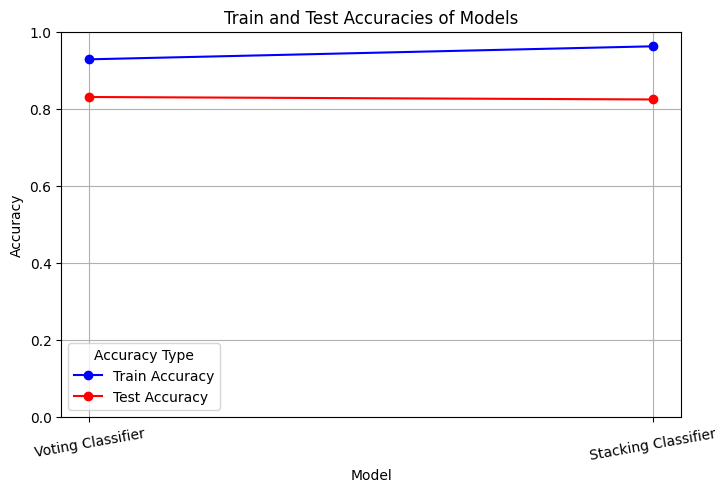

In [ ]:
import matplotlib.pyplot as plt

# Data for the models and their respective accuracies
models = ['Voting Classifier', 'Stacking Classifier']
train_accuracies = [0.9283, 0.9621]
test_accuracies = [0.8304, 0.8240]

# Create a line plot
plt.figure(figsize=(8, 5))

# Plotting train and test accuracies
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(models, test_accuracies, marker='o', label='Test Accuracy', color='r')

# Adding titles and labels
plt.title('Train and Test Accuracies of Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1]
plt.grid(True)
plt.legend(title='Accuracy Type')
plt.xticks(rotation=10)

# Show the plot
plt.show()


Inorder to increase the accuracy of modeling, the ensembling method was used like voting classifier and stacking classifer. In these two models were considered and they were random forest and Gradient booster. But the test accuracy and training accuracy difference was high, so the model prediction through ensembling not seems to be efficient. So the two models that best among three are trained seperately, and then accuracy was tested.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model
rf_classifier.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = rf_classifier.predict(x_train_smote)  # Predictions on training set
y_test_pred = rf_classifier.predict(x_test)  # Predictions on test set

# Calculate accuracy
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracies
print(f"Random Forest Classifier - Train Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Classifier - Test Accuracy: {test_accuracy:.4f}")


Accuracy scores for both the training and test sets are computed using accuracy_score().
The results show a high training accuracy of 95.13%, indicating the model fits the training data well.
The test accuracy of 79.24% is lower than the training accuracy, suggesting the model generalizes reasonably well but may slightly overfit on the training data due to the high training accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be run
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    max_depth=3,  # Maximum depth of the individual regression estimators
    subsample=1.0,  # Proportion of samples to use for fitting the individual base learners
    random_state=42
)

# Train the model
gb_classifier.fit(x_train_smote, y_train_smote)

# Make predictions
y_train_pred = gb_classifier.predict(x_train_smote)  # Predictions on training set
y_test_pred = gb_classifier.predict(x_test)  # Predictions on test set

# Calculate accuracy
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracies
print(f"Gradient Boosting Classifier - Train Accuracy: {train_accuracy:.4f}")
print(f"Gradient Boosting Classifier - Test Accuracy: {test_accuracy:.4f}")


Gradient Boosting Classifier - Train Accuracy: 0.8298
Gradient Boosting Classifier - Test Accuracy: 0.7720


The code trains a Gradient Boosting Classifier and evaluates its accuracy on both the training and test datasets to measure its effectiveness and generalizability. The Random Forest Classifier had a high training accuracy (95.13%), which suggested some degree of overfitting. The Gradient Boosting Classifier, with a training accuracy of 83.03%, appears less prone to overfitting. The Gradient Boosting Classifier's test accuracy (77.61%) is slightly lower than the Random Forest Classifier’s test accuracy (79.24%), but the closer alignment between training and test accuracies in the Gradient Boosting Classifier may indicate better generalization. The Random Forest Classifier performed marginally better on the test set. However, the Gradient Boosting Classifier’s lower training accuracy could make it a more stable choice if the goal is to avoid overfitting in new data

In [ ]:
import joblib

# Save the model to a file
joblib.dump(gb_classifier, 'gb_classifier_DiabetesUnlocked_model.joblib')
print("Model saved successfully!")

Model saved successfully!


This code saves the trained gb_classifier model to a file named 'diabetes_model.joblib' using joblib. This way, you can reload the model later without needing to retrain it, saving time and computational resources.